In [2]:
pip install pyedflib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, medfilt, firwin
import pyedflib

In [4]:
ecg_file_path = 'F:\\RME\\4Y1S\\DSP Lab\\FIR FILTER LAB\\ecg\\ecg\\r01.edf'


Plotting all the signals in time domain

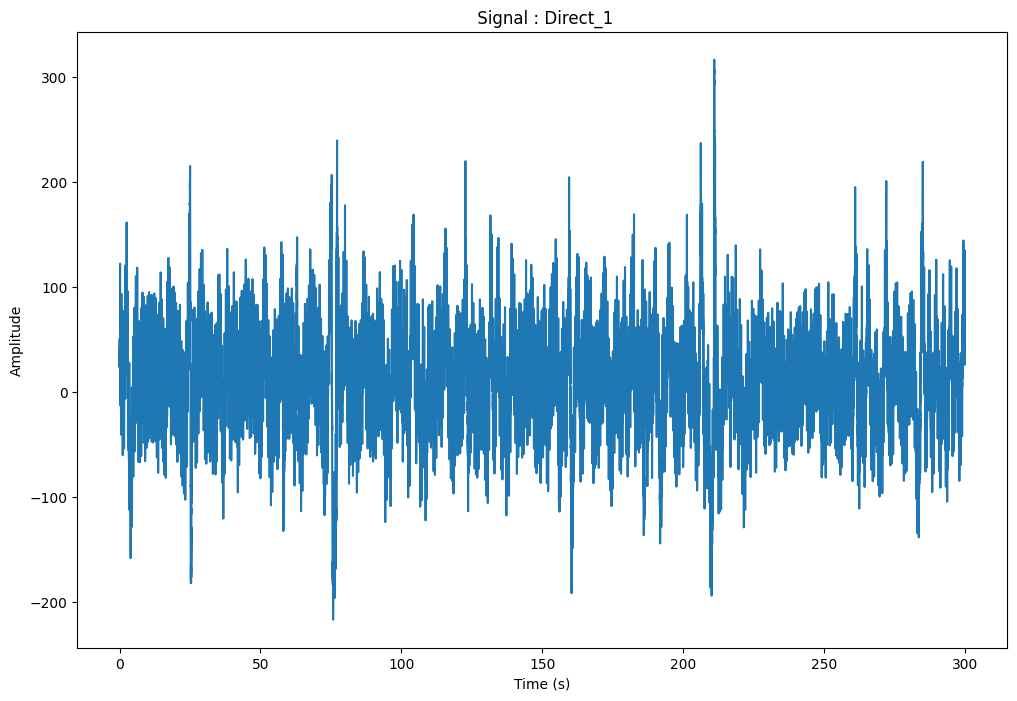

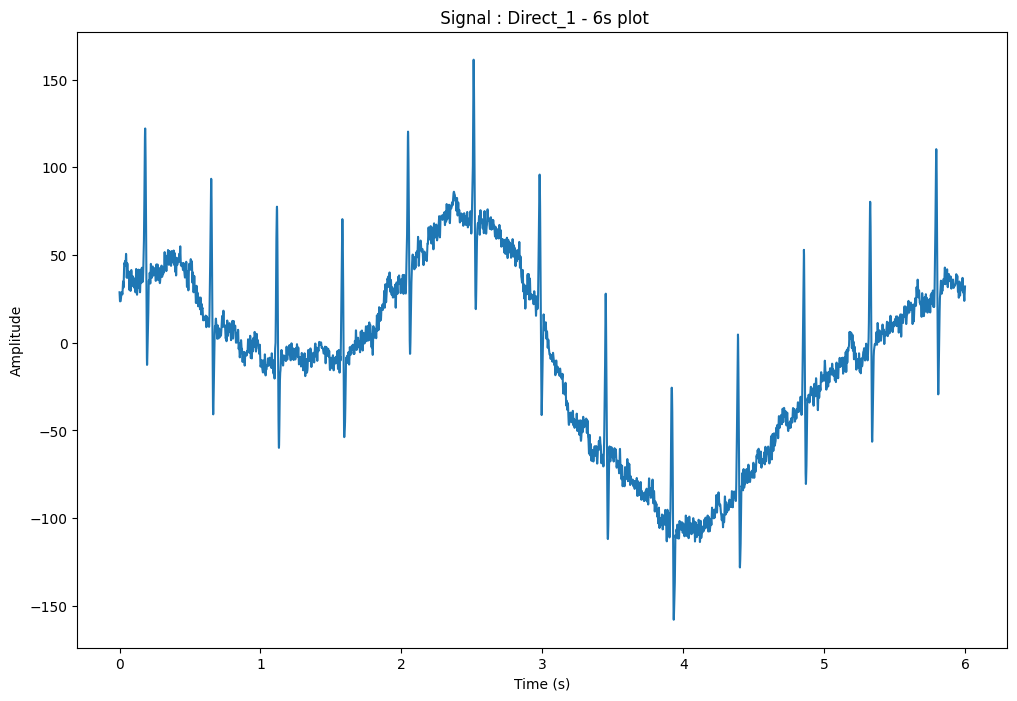

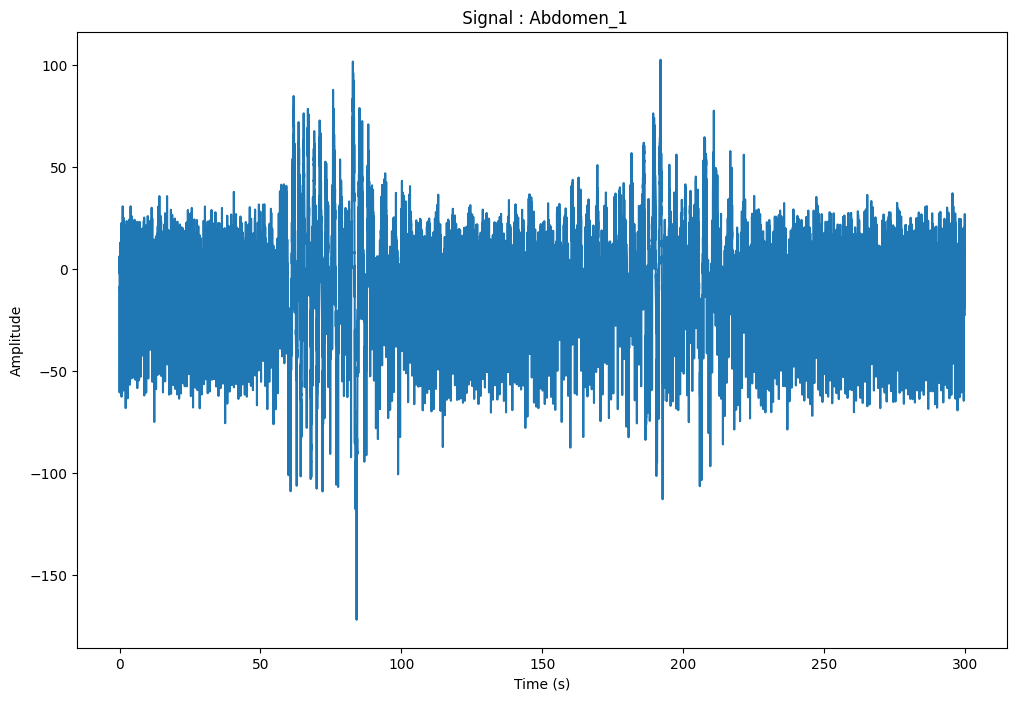

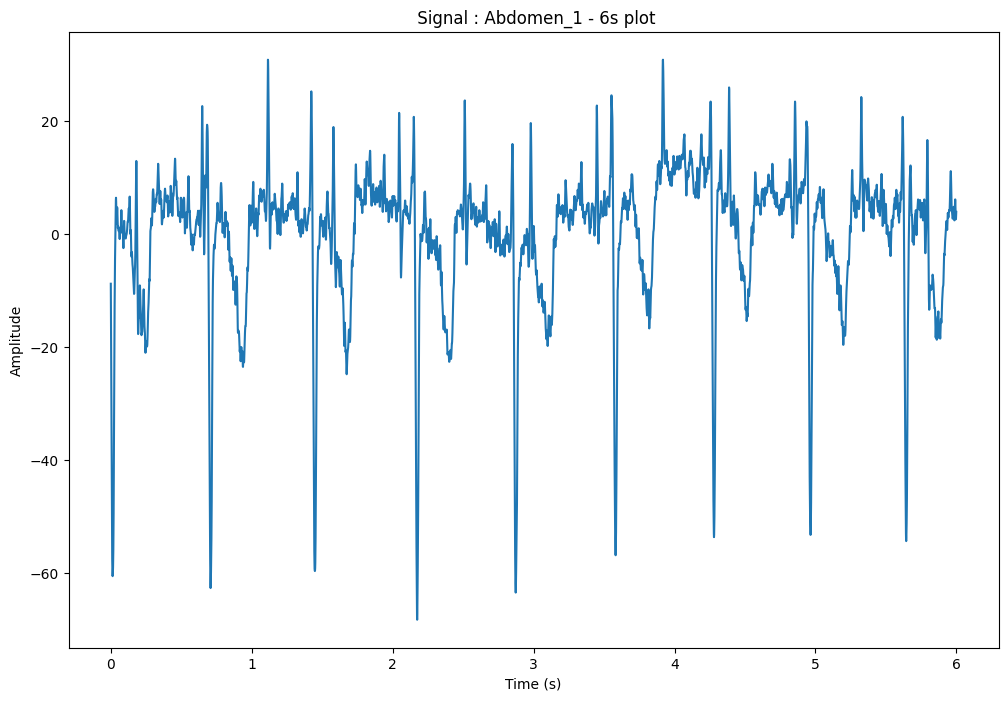

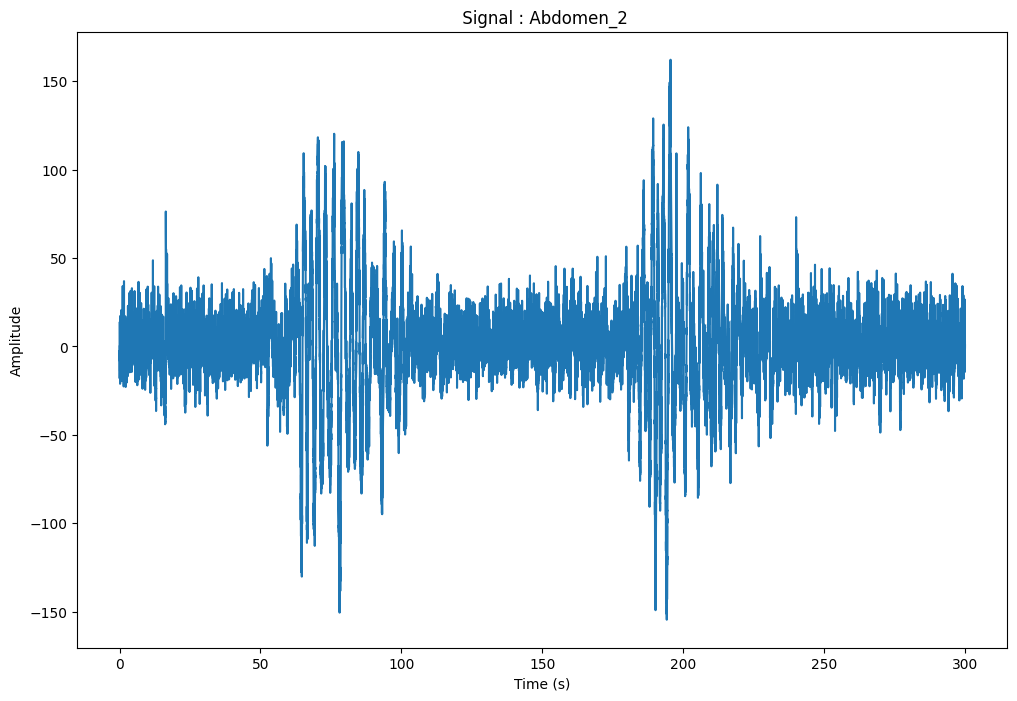

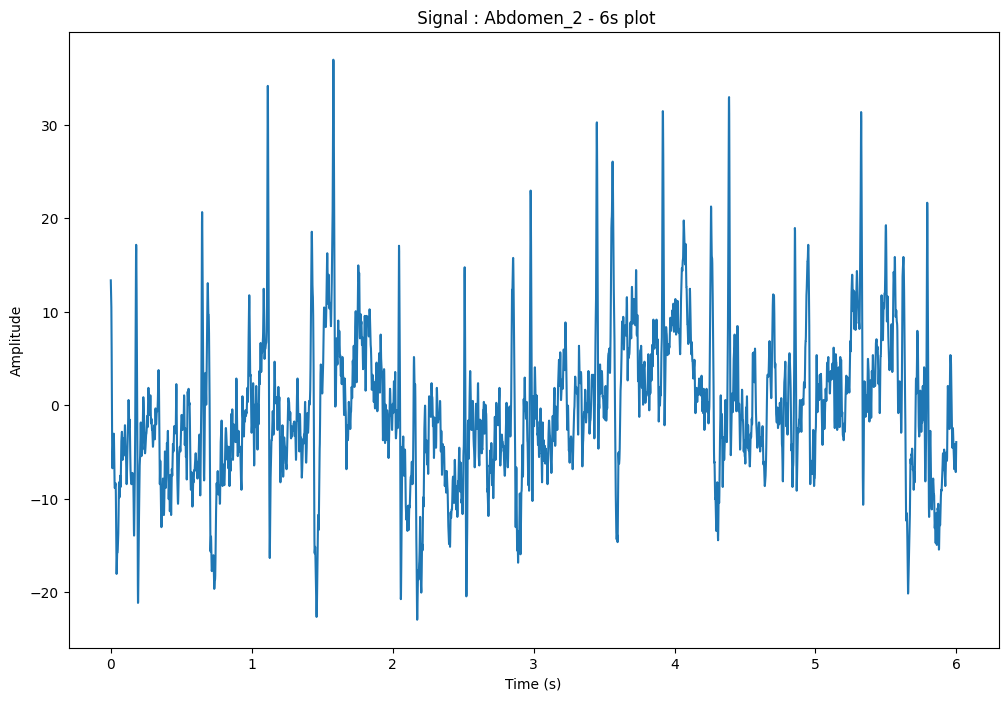

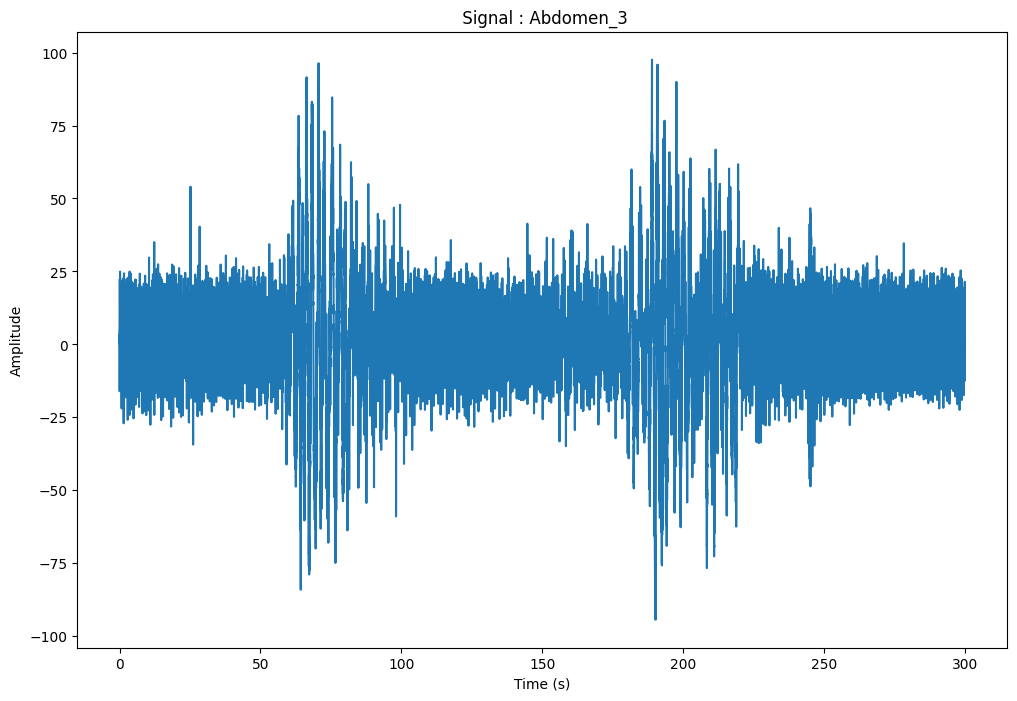

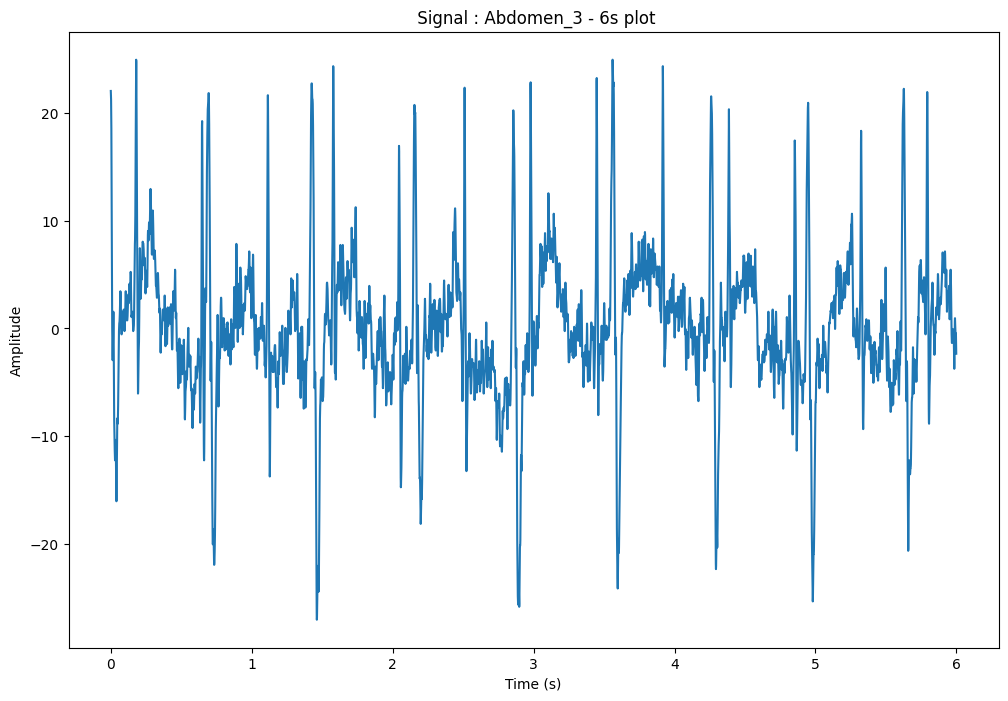

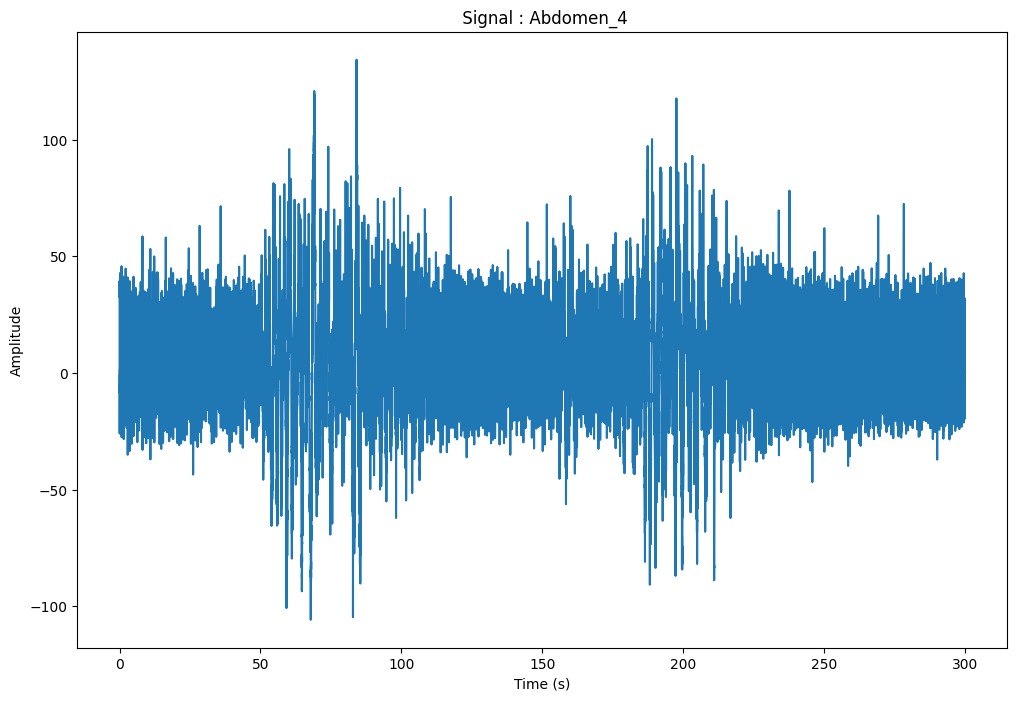

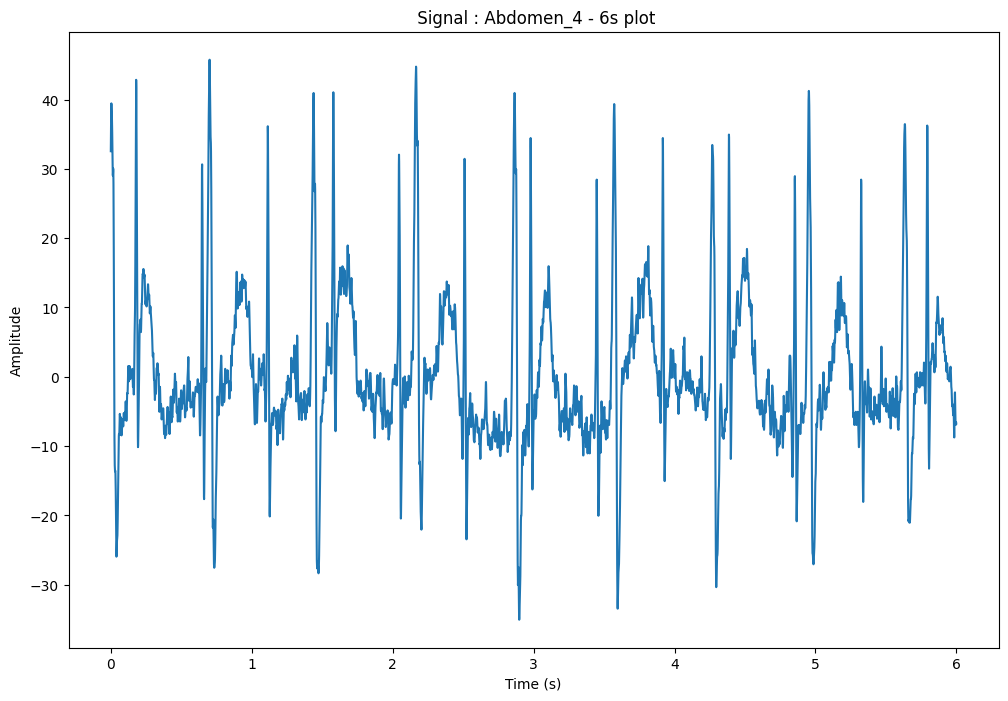

In [5]:
#Plotting the signals in time domain
signal_dict = {}
def plotting_time_domain(file_path):
    with pyedflib.EdfReader(file_path) as f:
        signal_labels = f.getSignalLabels()

   
        for i, label in enumerate(signal_labels):
          
            signal_data = f.readSignal(i)
            

            sampling_frequency = f.getSampleFrequency(i)
            signal_list = [signal_data,sampling_frequency]
            time = np.arange(len(signal_data)) / sampling_frequency
            signal_dict[label] = signal_list

        # Plot the current channel
            plt.figure(figsize=(12, 8))
            plt.plot(time, signal_data)
            plt.title(f' Signal : {label}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.show()
        
            plt.figure(figsize=(12, 8))
            plt.plot(time[:6000], signal_data[:6000])
            plt.title(f' Signal : {label} - 6s plot')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.show()
            
plotting_time_domain(ecg_file_path)
        

In [6]:
print(signal_dict)

{'Direct_1': [array([28.7504387 , 26.65040665, 24.75037766, ..., 51.05077897,
       50.85077592, 50.95077745]), 1000.0], 'Abdomen_1': [array([ -8.85013504, -13.95021286, -18.75028611, ...,   8.95013657,
         8.95013657,   9.05013809]), 1000.0], 'Abdomen_2': [array([13.35020371, 12.65019303, 12.05018387, ...,  0.15000229,
        0.45000687,  0.65000992]), 1000.0], 'Abdomen_3': [array([22.05033646, 21.75033188, 21.25032425, ...,  1.45002213,
        2.05003128,  2.15003281]), 1000.0], 'Abdomen_4': [array([32.55049668, 35.35053941, 37.55057298, ..., -0.35000534,
       -0.05000076,  0.55000839]), 1000.0]}


Performing fft on all the signals

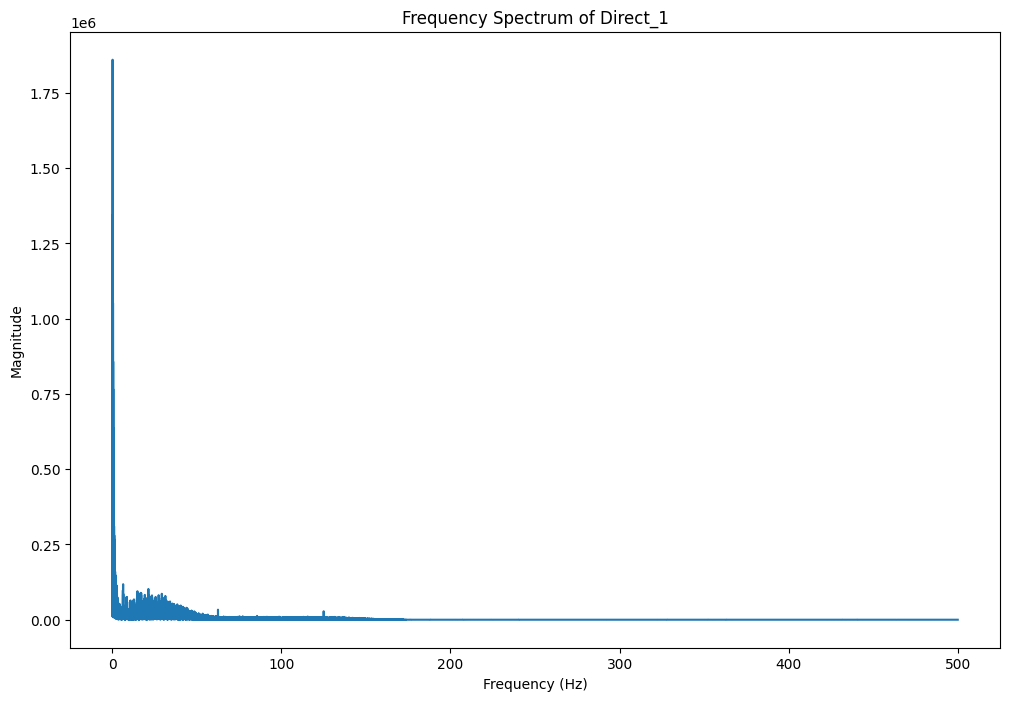

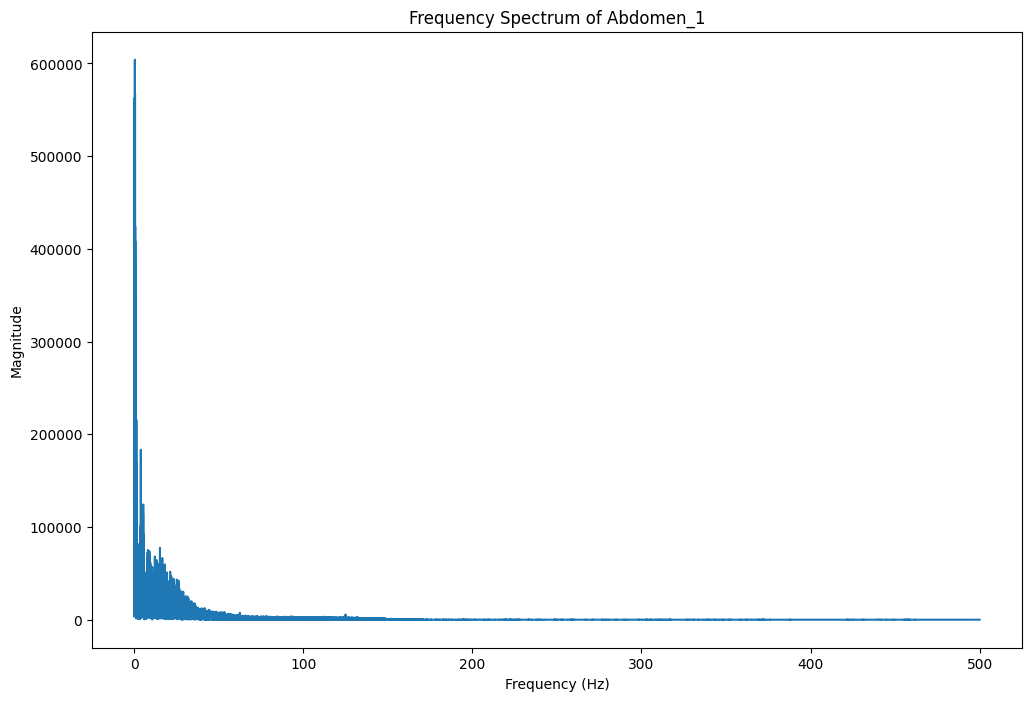

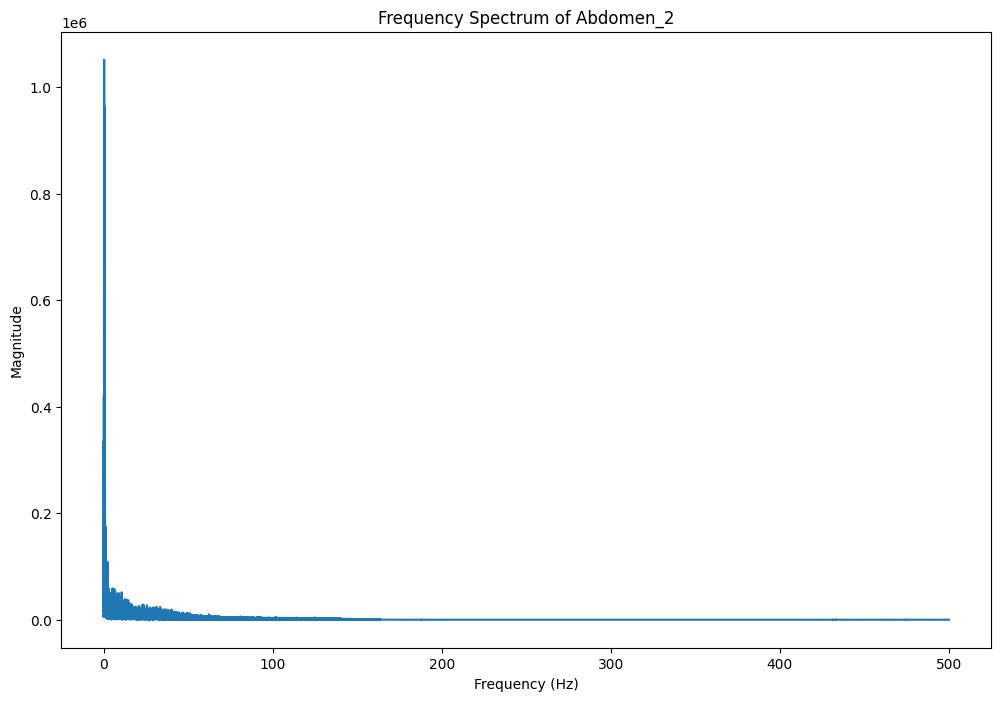

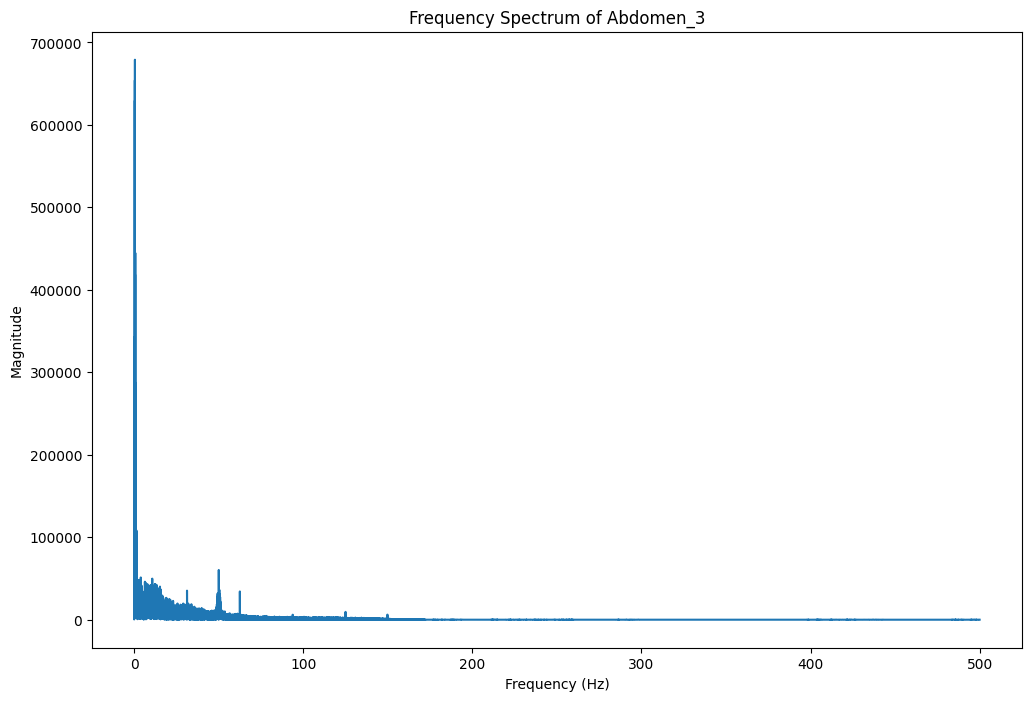

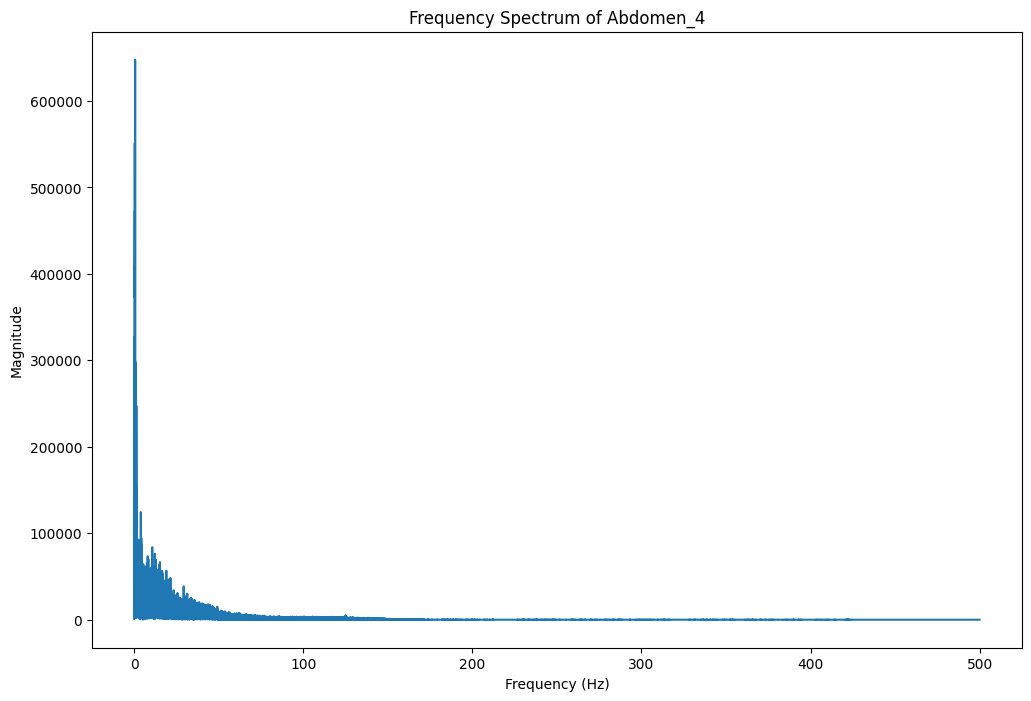

In [7]:
#Plotting in frequency domain
from numpy.fft import fft, fftfreq

def analyze_fft(signal, fs,label):
    n = len(signal)
    freq = fftfreq(n, d=1/fs)
    magnitude = np.abs(fft(signal))
    plt.figure(figsize=(12, 8))
    plt.plot(freq[:n//2], magnitude[:n//2])
    plt.title(f"Frequency Spectrum of {label}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()
for keys in signal_dict:
    signal,fs = signal_dict[keys]
    analyze_fft(signal,fs,keys)

Designing the filters (Butterworth and ChebyShev)

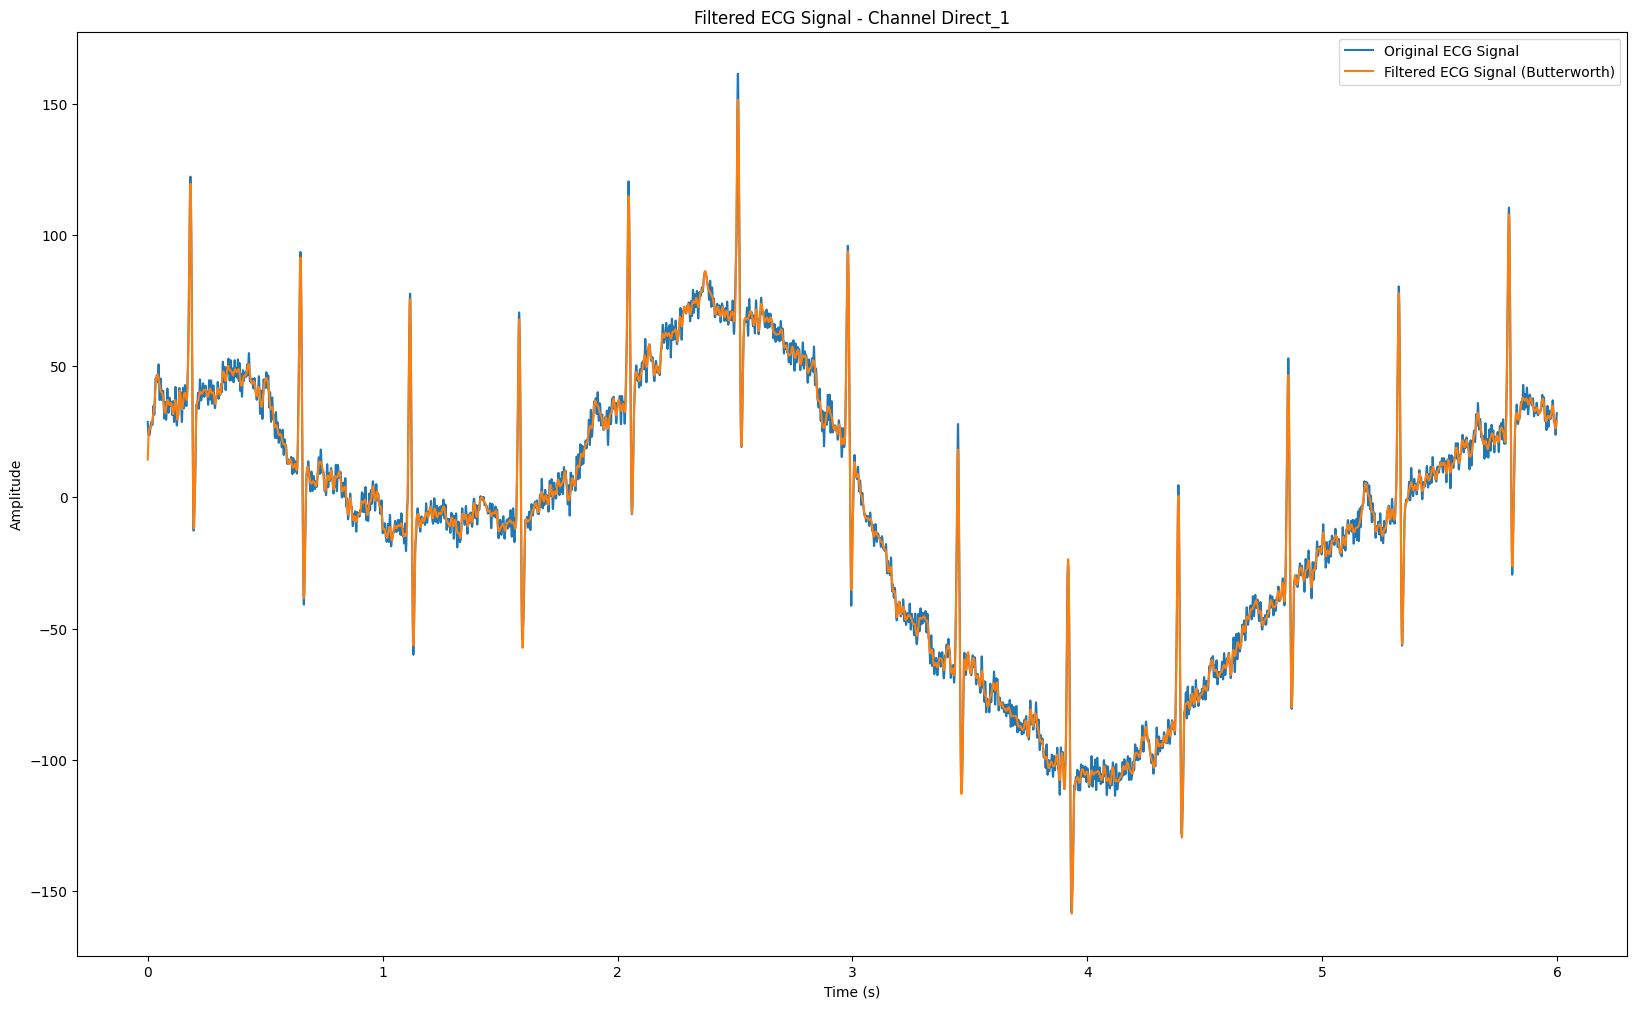

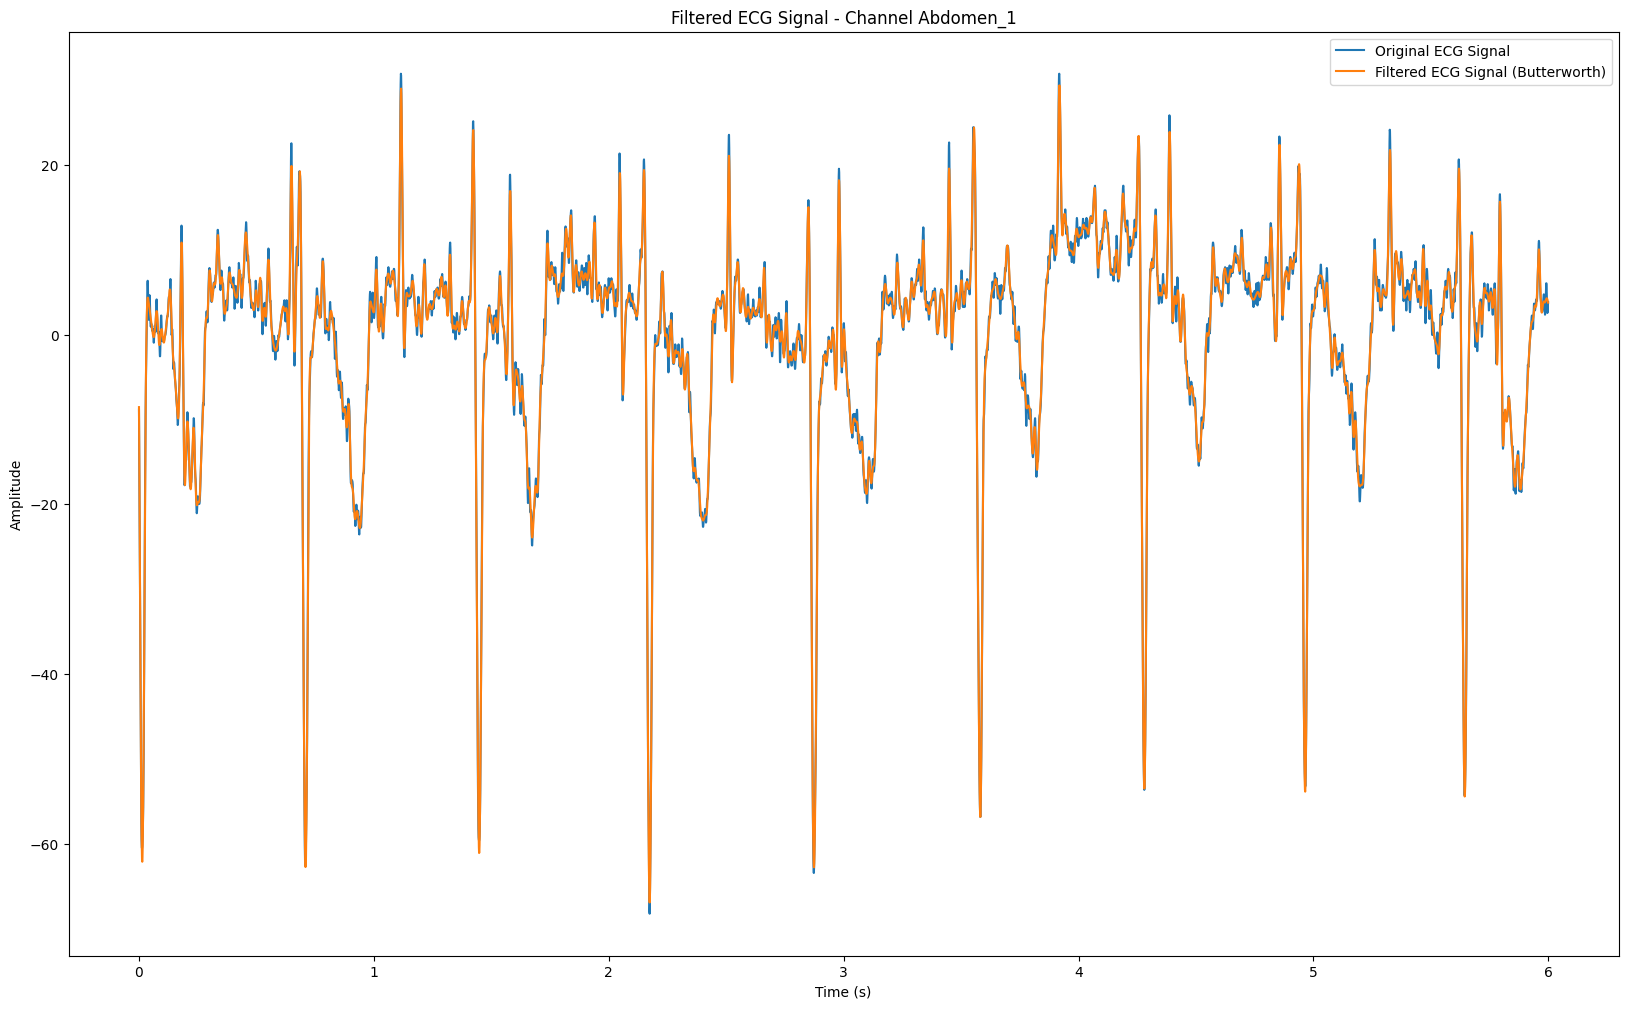

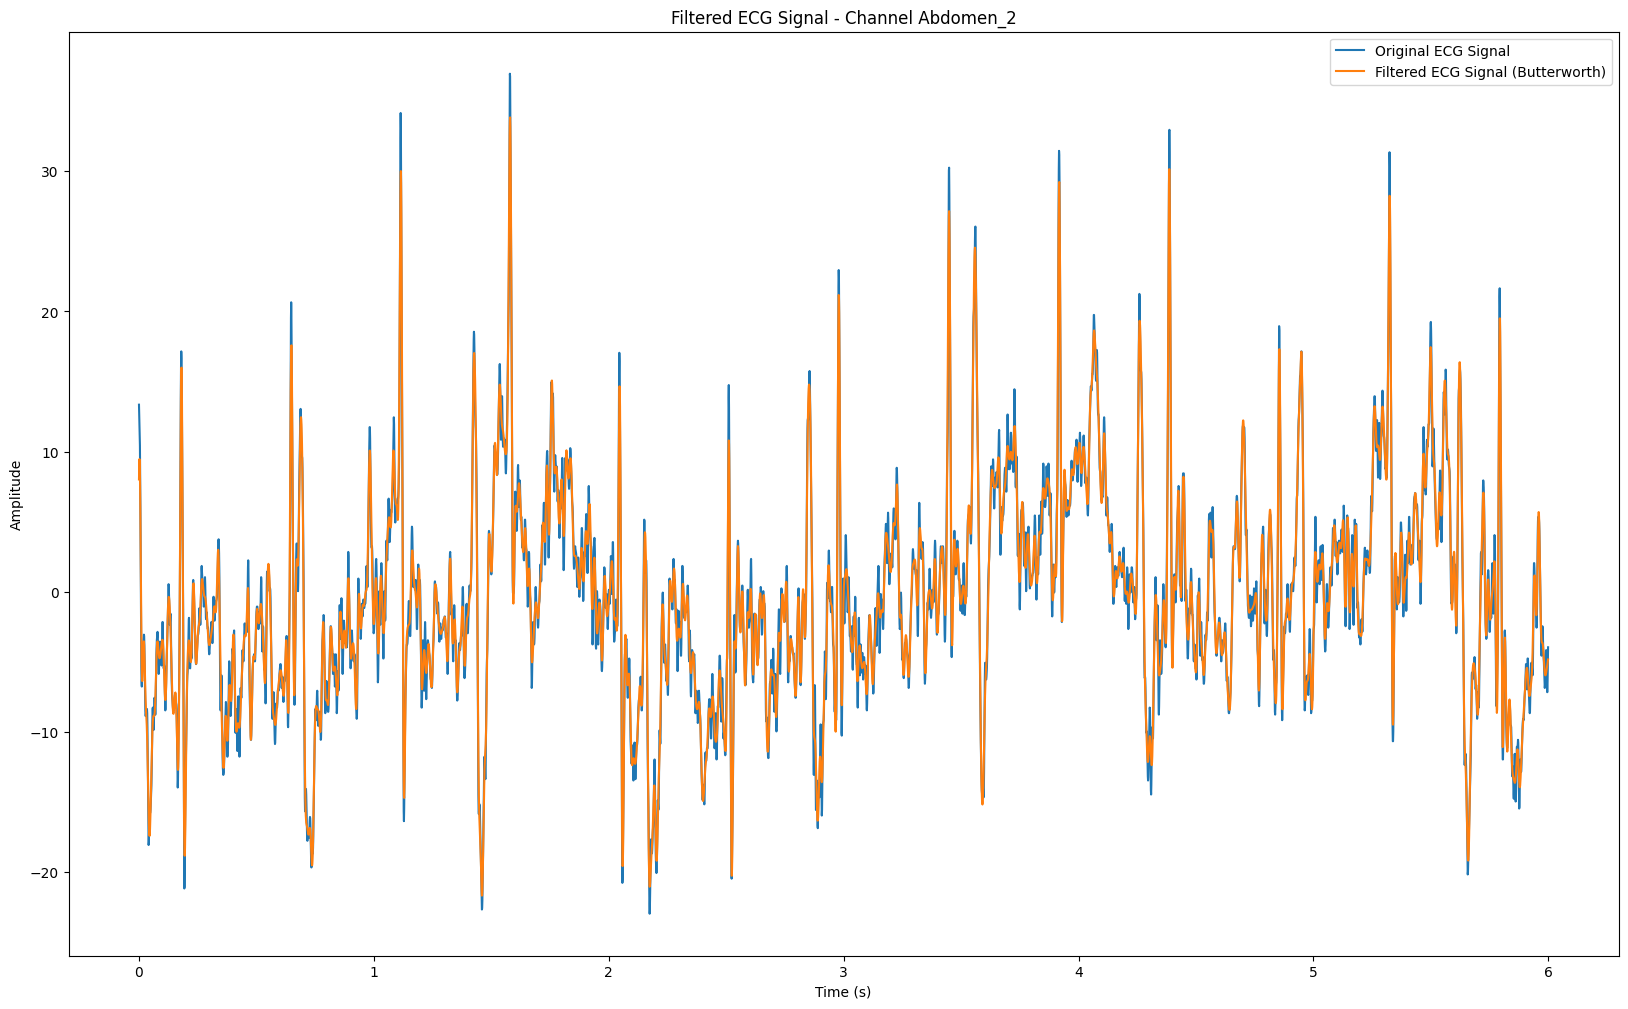

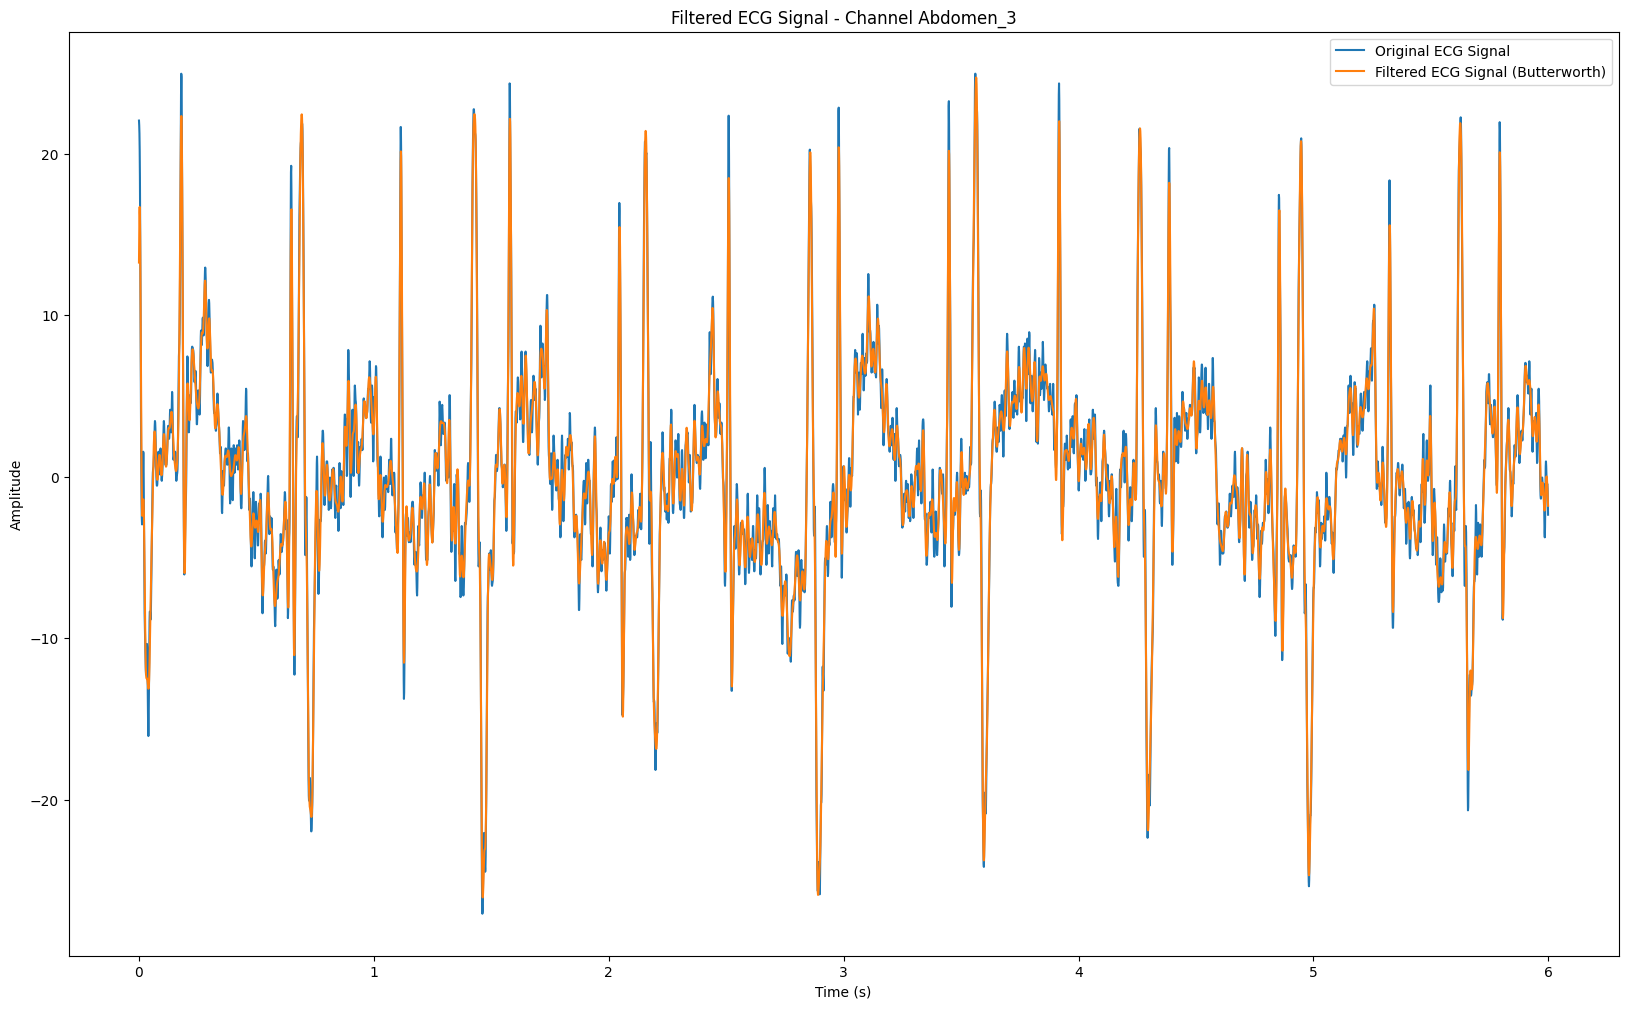

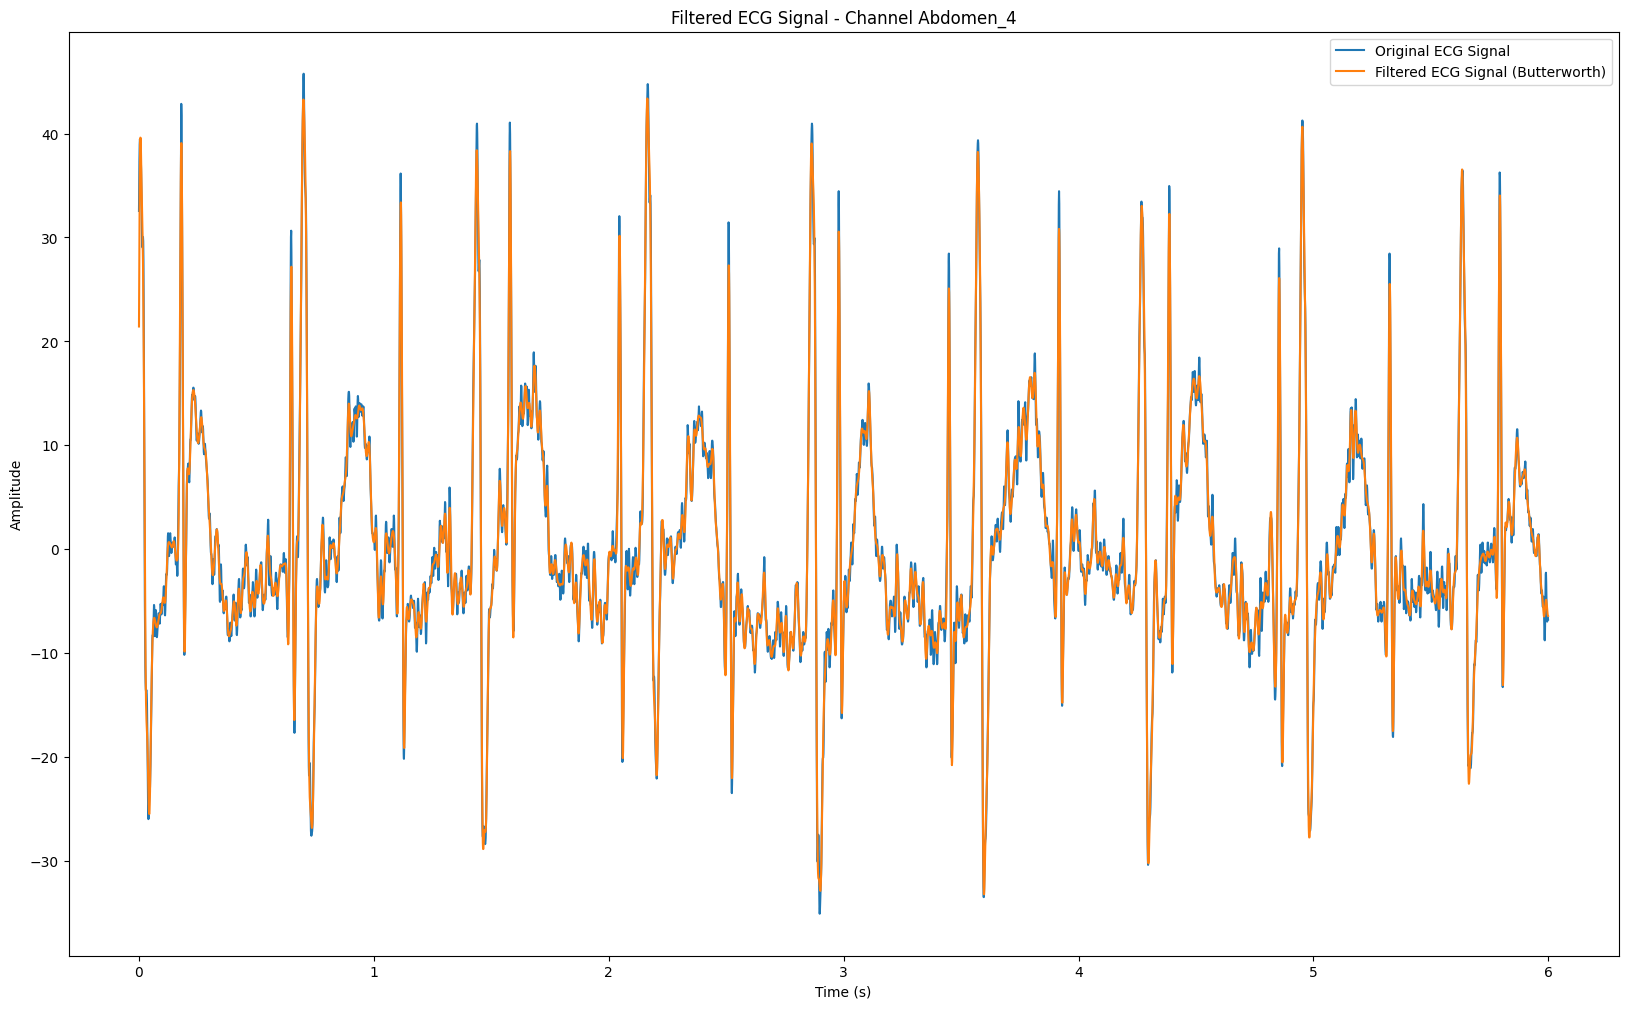

In [23]:
#Filter method
from scipy.signal import medfilt, firwin, convolve
def design_filter(filter_type,cutoff,fs,data,numtaps=101,rp=1,window_size = 25):
    if filter_type == 'butter':
        nyquist_freq = 0.5 * fs
        normal_cutoff = cutoff / nyquist_freq
        taps = firwin(numtaps, normal_cutoff)
        filtered_data = convolve(data, taps, mode='same')  
        return filtered_data
    if filter_type == 'cheby':
        nyquist_freq = 0.5 * fs
        nyq_cutoff = cutoff / nyquist_freq
        taps = firwin(numtaps, nyq_cutoff, window=('chebwin', rp))
        filtered_data = np.convolve(data, taps, mode='same')
        return filtered_data



cutoff_1 = 65
#Butterworth filter cutoff frequency example one
for keys in signal_dict:
    signal,fs = signal_dict[keys]
    filtered_ecg_butter = design_filter('butter', cutoff_1, fs,signal, 101)
    t = np.arange(len(signal)) / fs
    # Plotting
    plt.figure(figsize=(20, 12))
    plt.plot(t[:6000], signal[:6000], label='Original ECG Signal')
    plt.plot(t[:6000], filtered_ecg_butter[:6000], label='Filtered ECG Signal (Butterworth)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Filtered ECG Signal - Channel {keys}')
    plt.legend()

    plt.show()
        

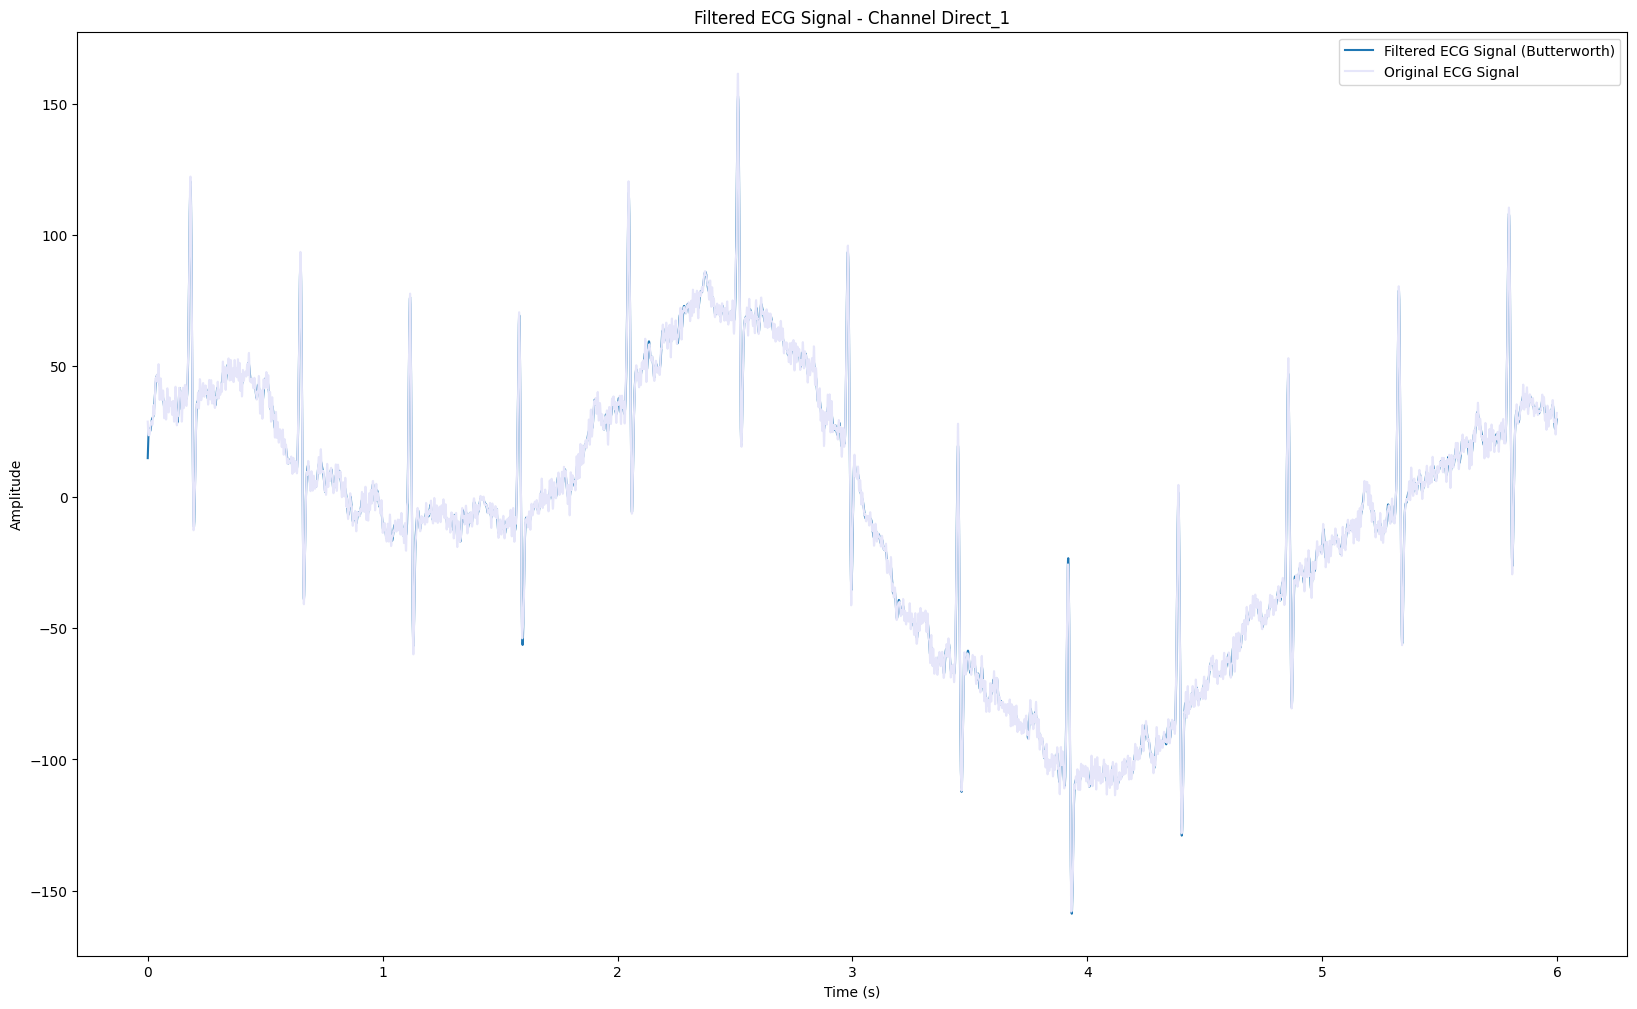

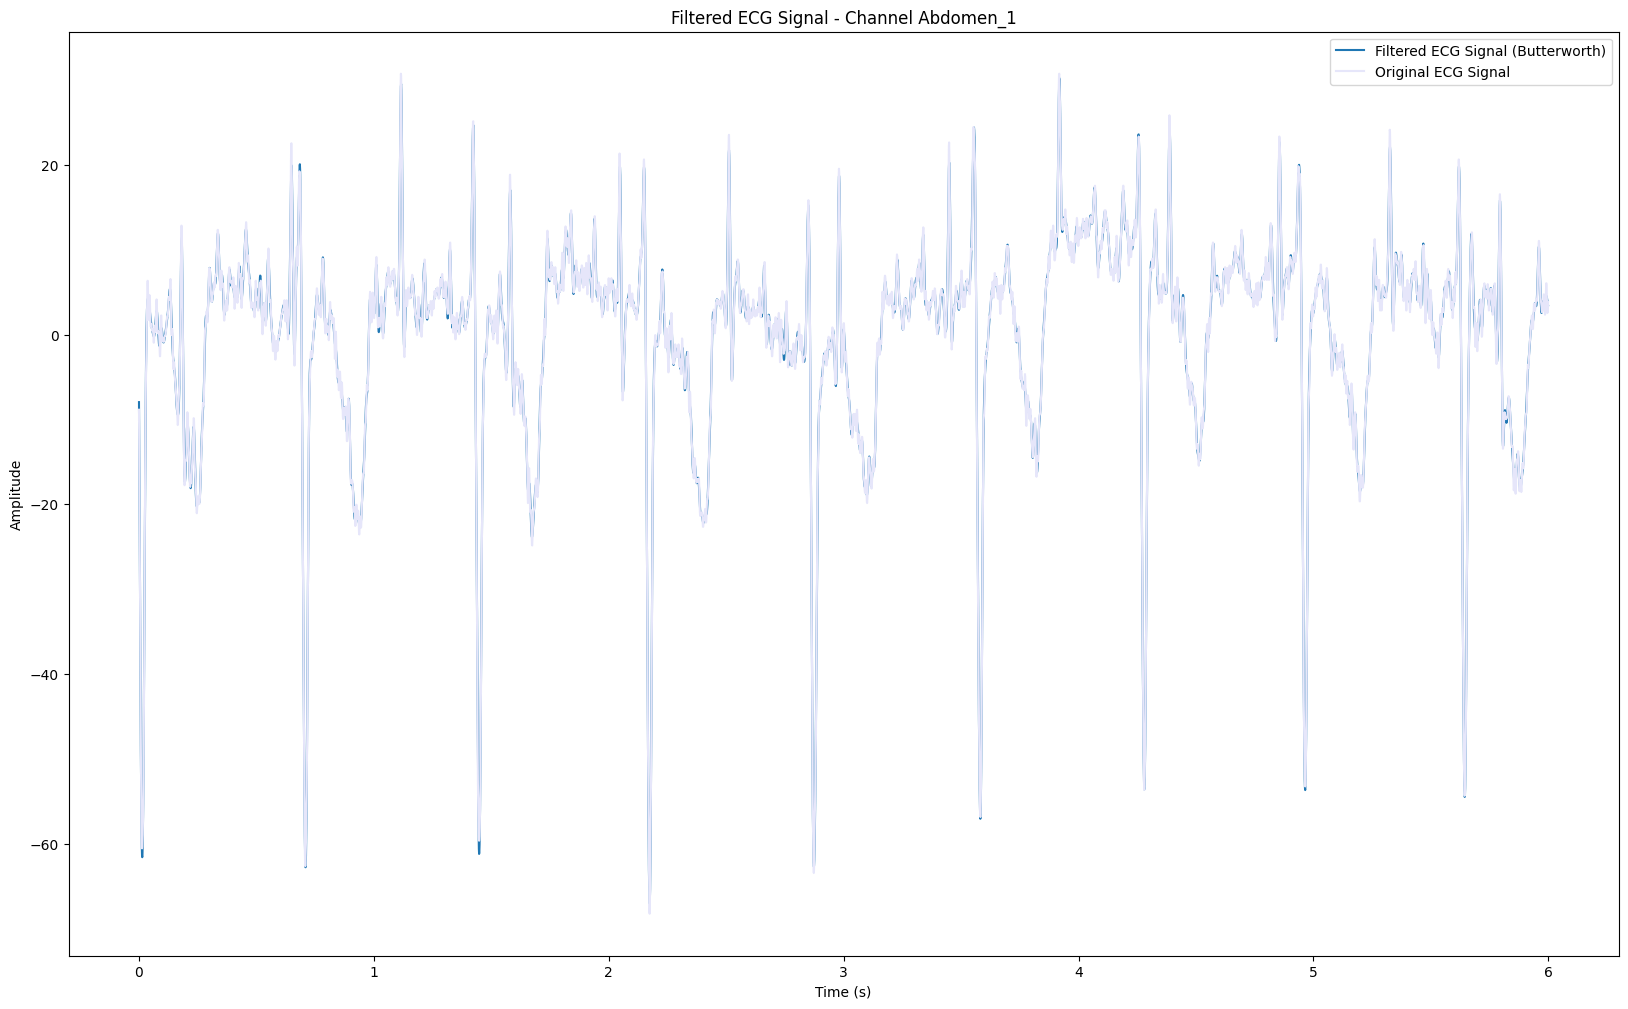

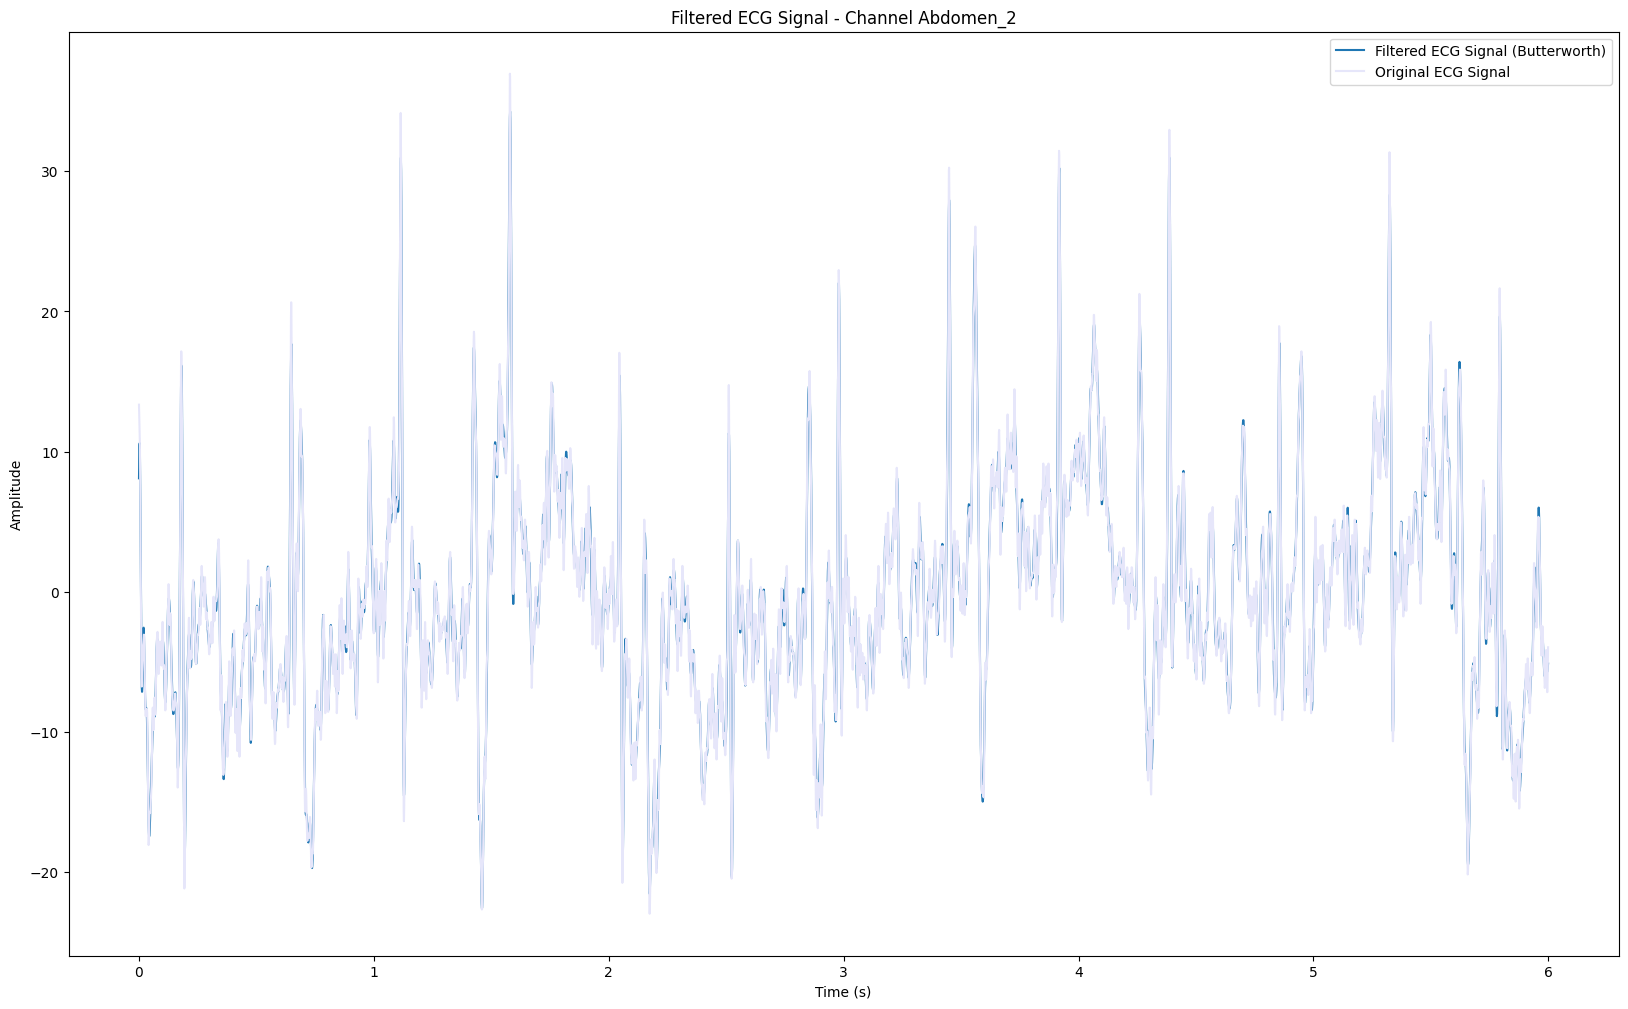

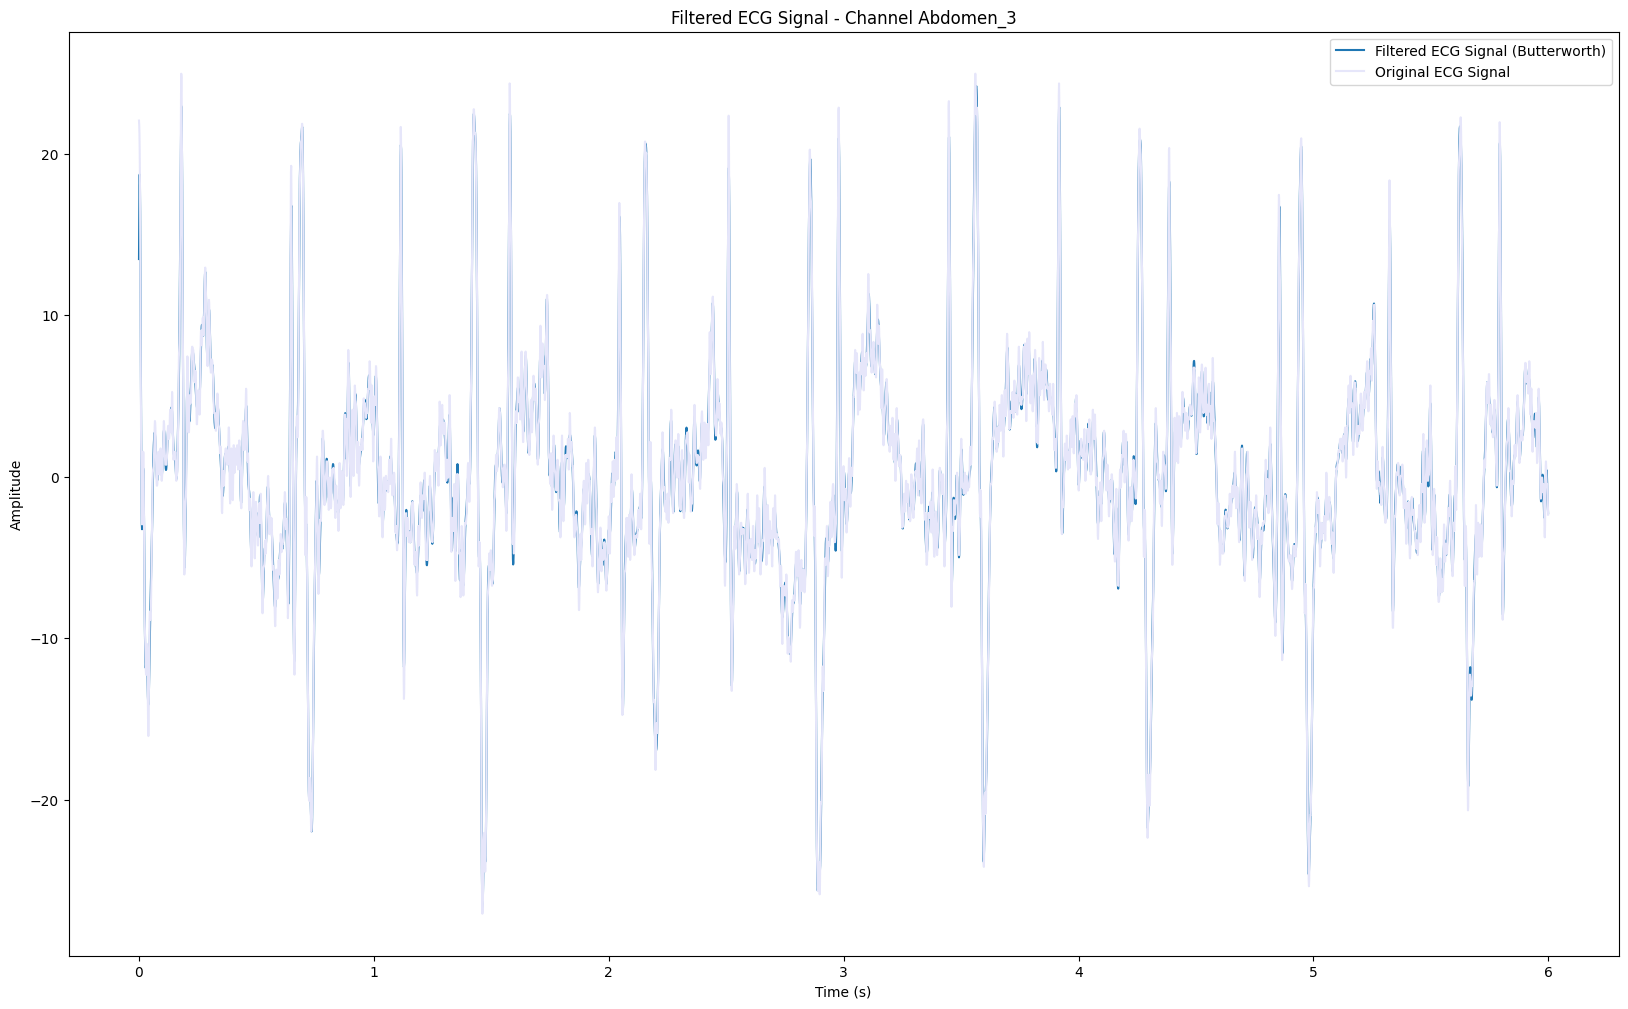

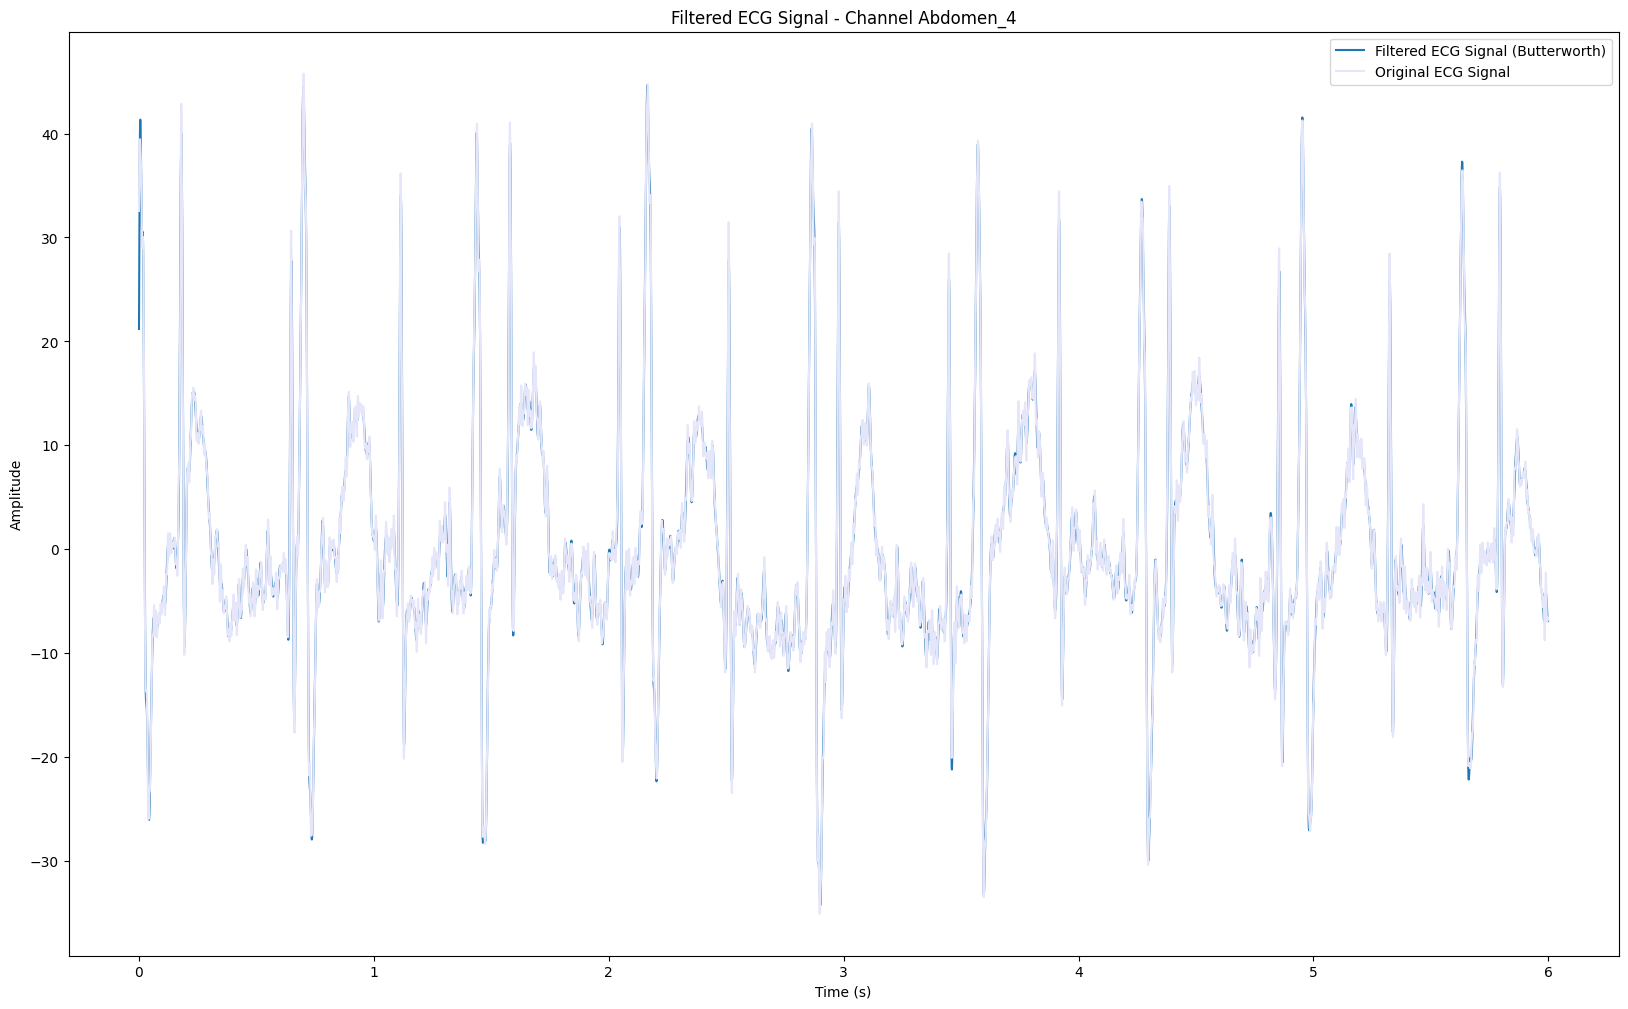

In [14]:
#Low pass cutoff frequency for butterworth filter
cutoff_2 = 75
for keys in signal_dict:
    signal,fs = signal_dict[keys]
    filtered_ecg_butter = design_filter('butter', cutoff_2, fs,signal, 101)
    t = np.arange(len(signal)) / fs
    # Plotting
    plt.figure(figsize=(20, 12))
    plt.plot(t[:6000], filtered_ecg_butter[:6000], label='Filtered ECG Signal (Butterworth)')
    plt.plot(t[:6000], signal[:6000], label='Original ECG Signal',c='lavender')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Filtered ECG Signal - Channel {keys}')
    plt.legend()

    plt.show()

ChebyShev Filter with two cutoff frequencies

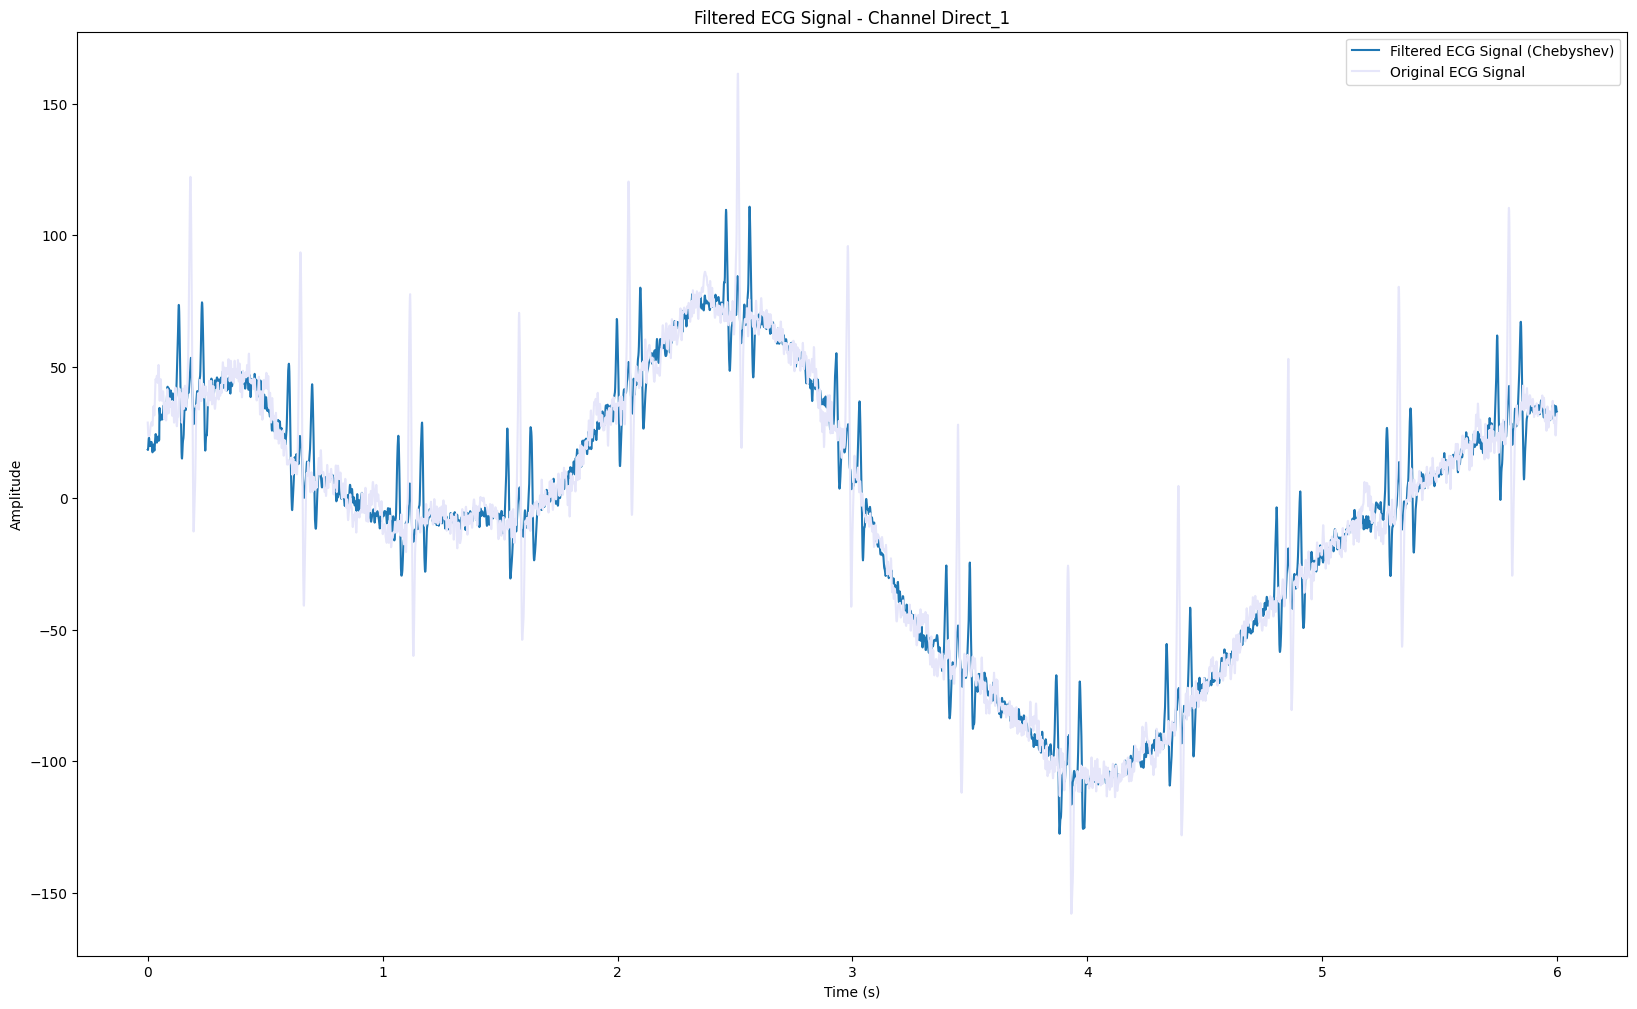

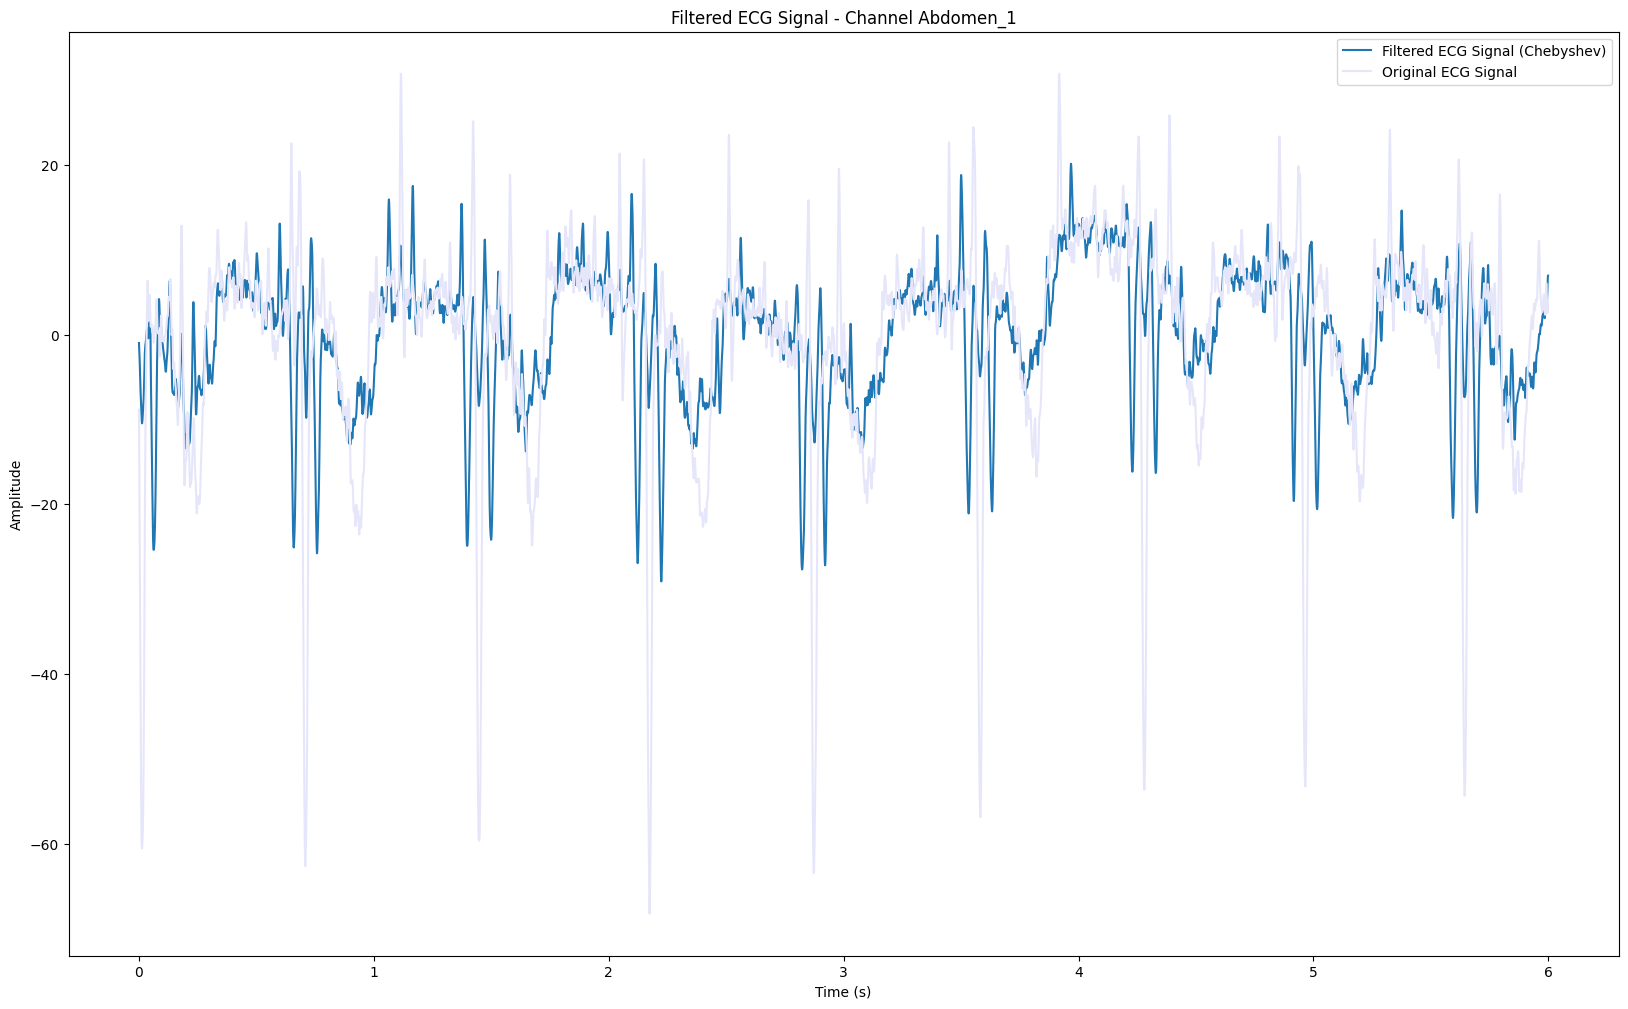

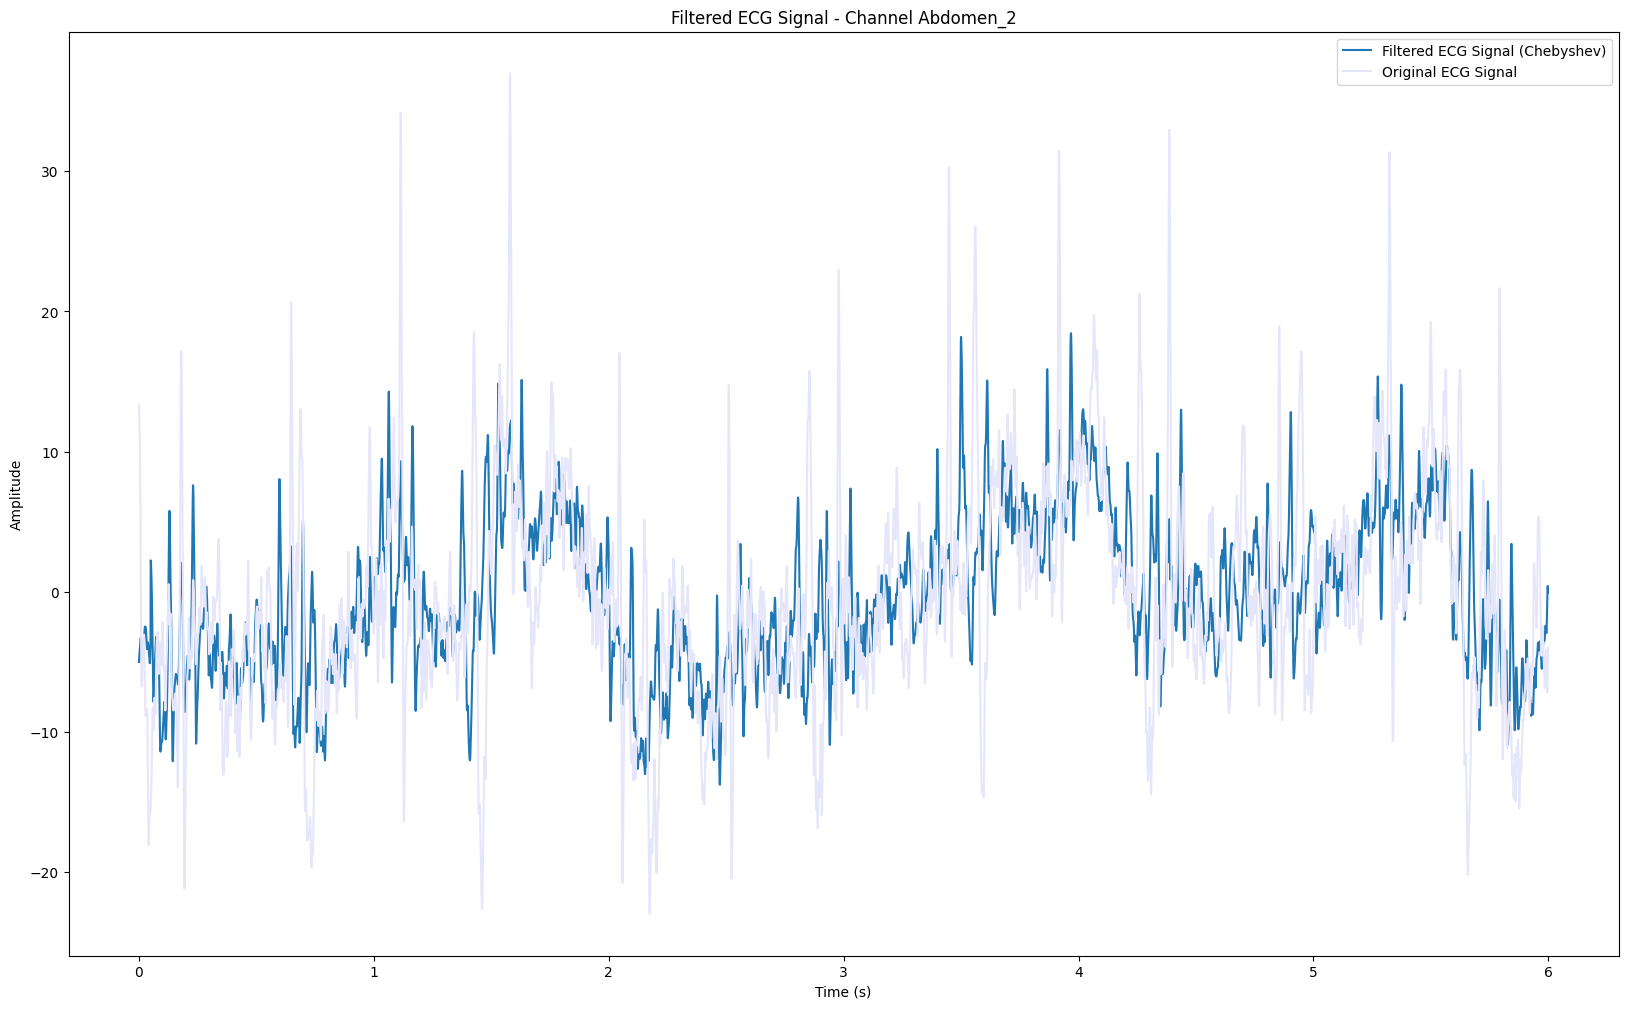

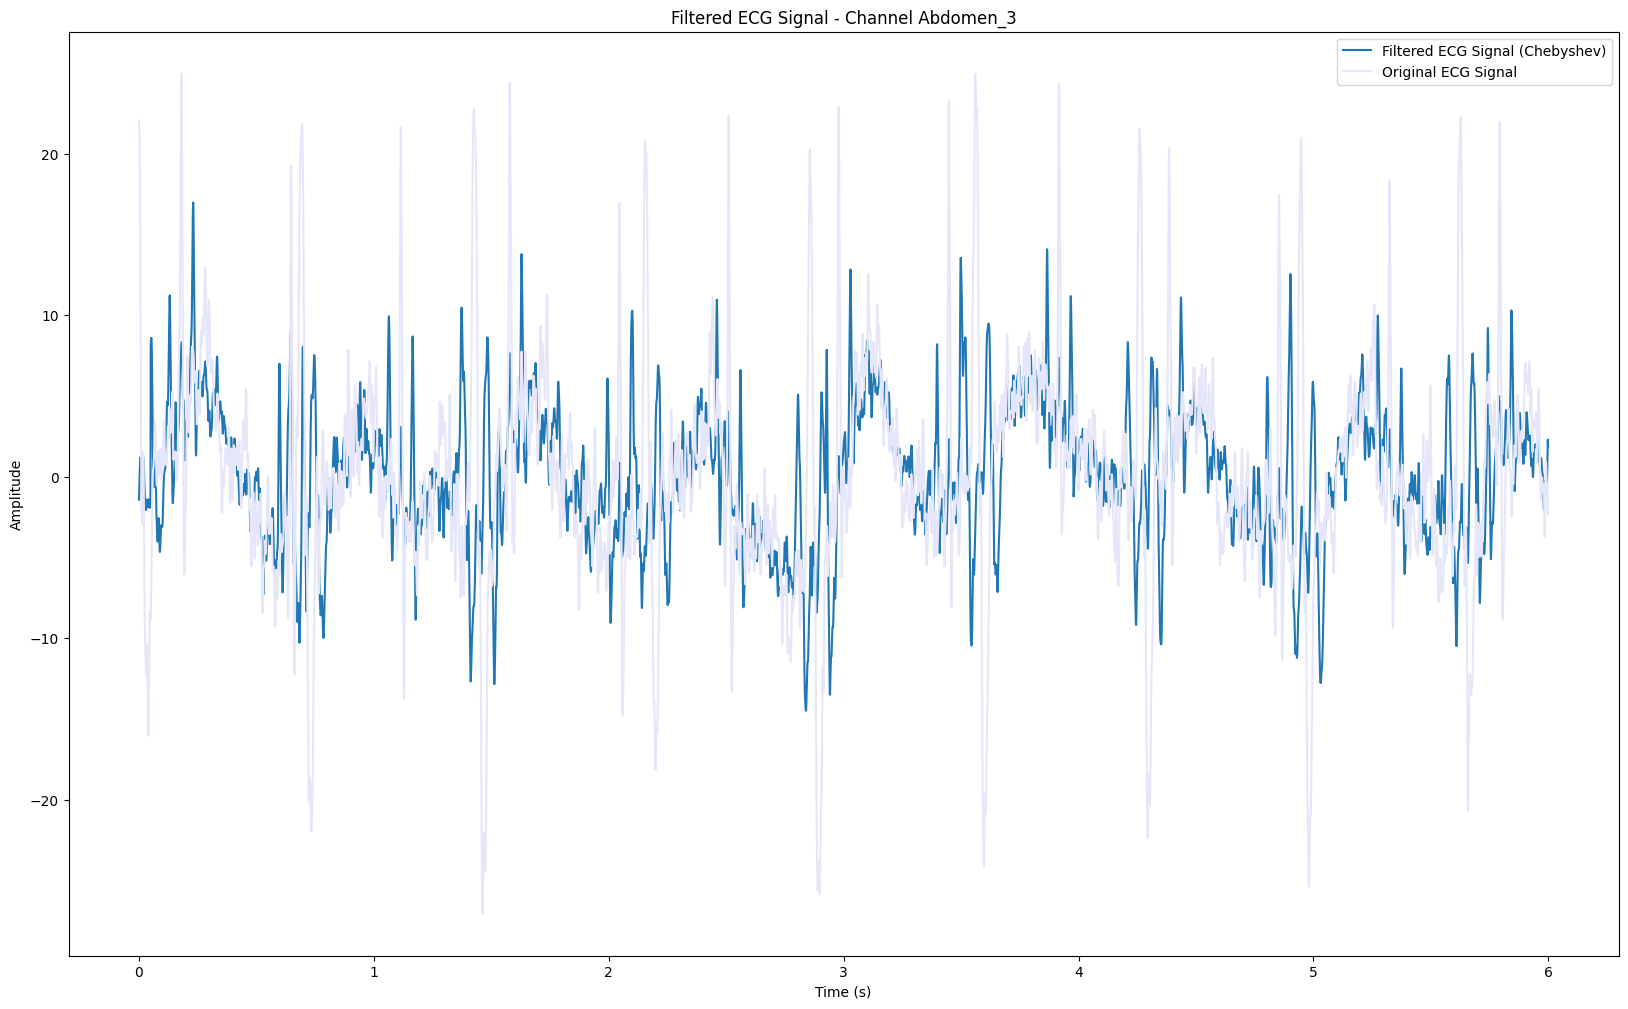

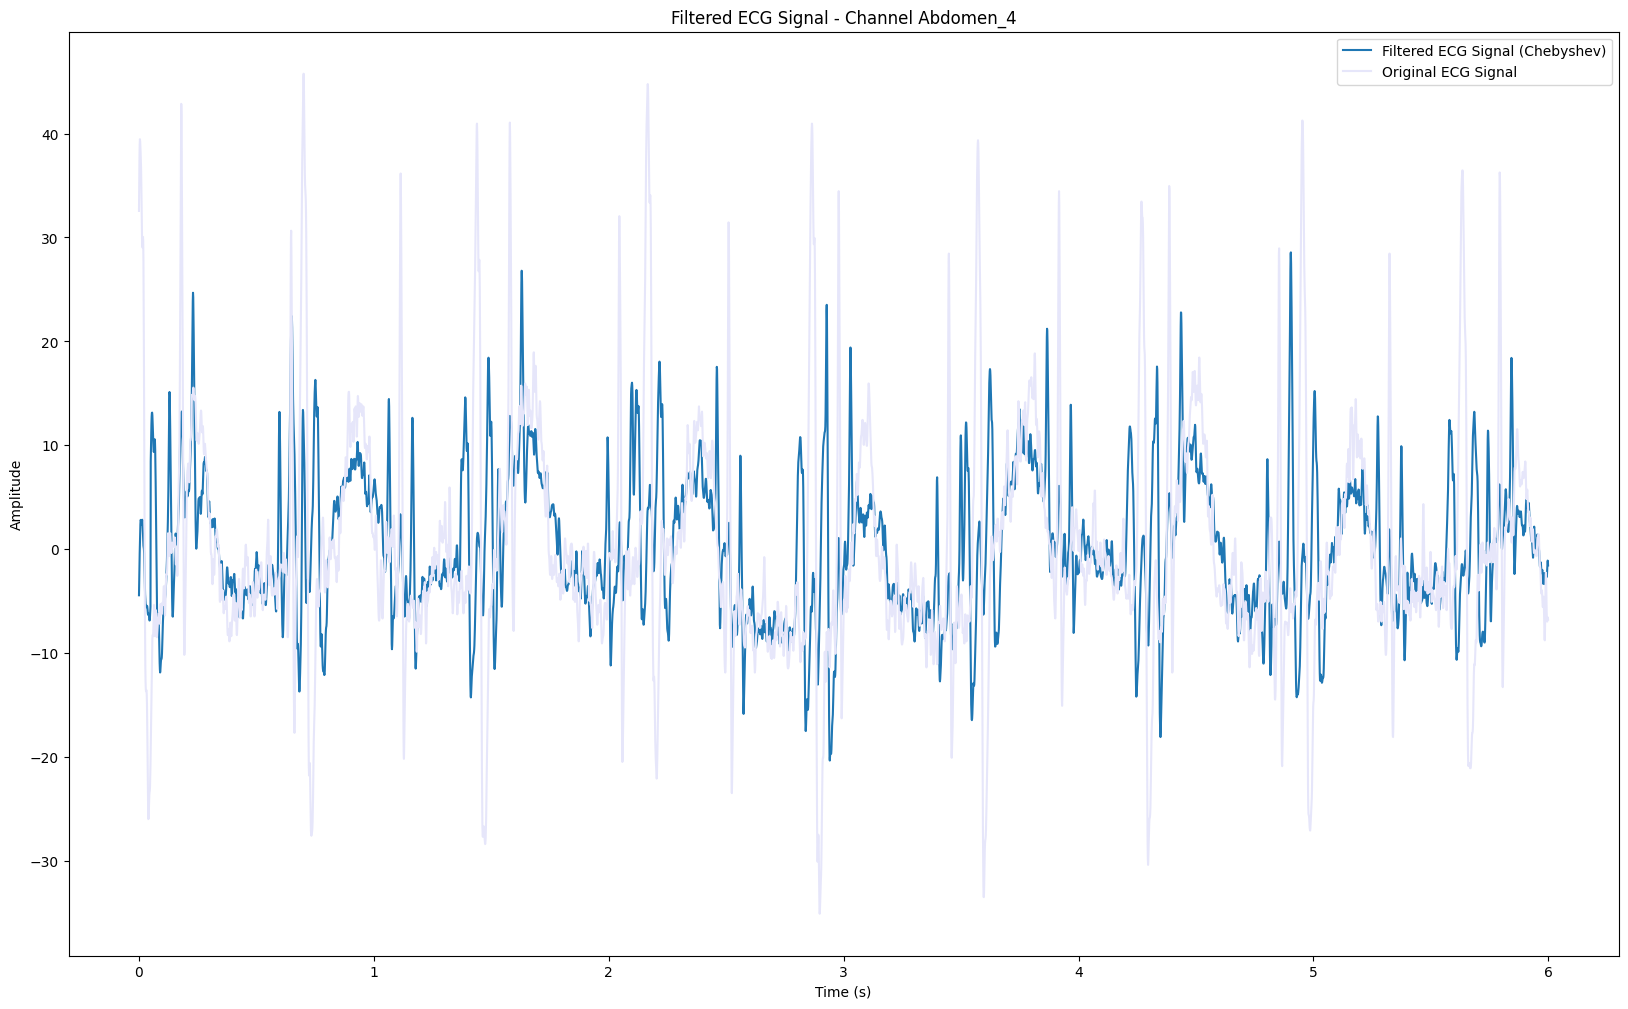

In [18]:

cutoff_cheby = 65

for keys in signal_dict:
    signal,fs = signal_dict[keys]
    filtered_ecg_cheby = design_filter('cheby', cutoff_cheby, fs,signal, 101)
    t = np.arange(len(signal)) / fs
    # Plotting
    plt.figure(figsize=(20, 12))
    plt.plot(t[:6000], filtered_ecg_cheby[:6000], label='Filtered ECG Signal (Chebyshev)')
    plt.plot(t[:6000], signal[:6000], label='Original ECG Signal',c='lavender')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Filtered ECG Signal - Channel {keys}')
    plt.legend()

    plt.show()


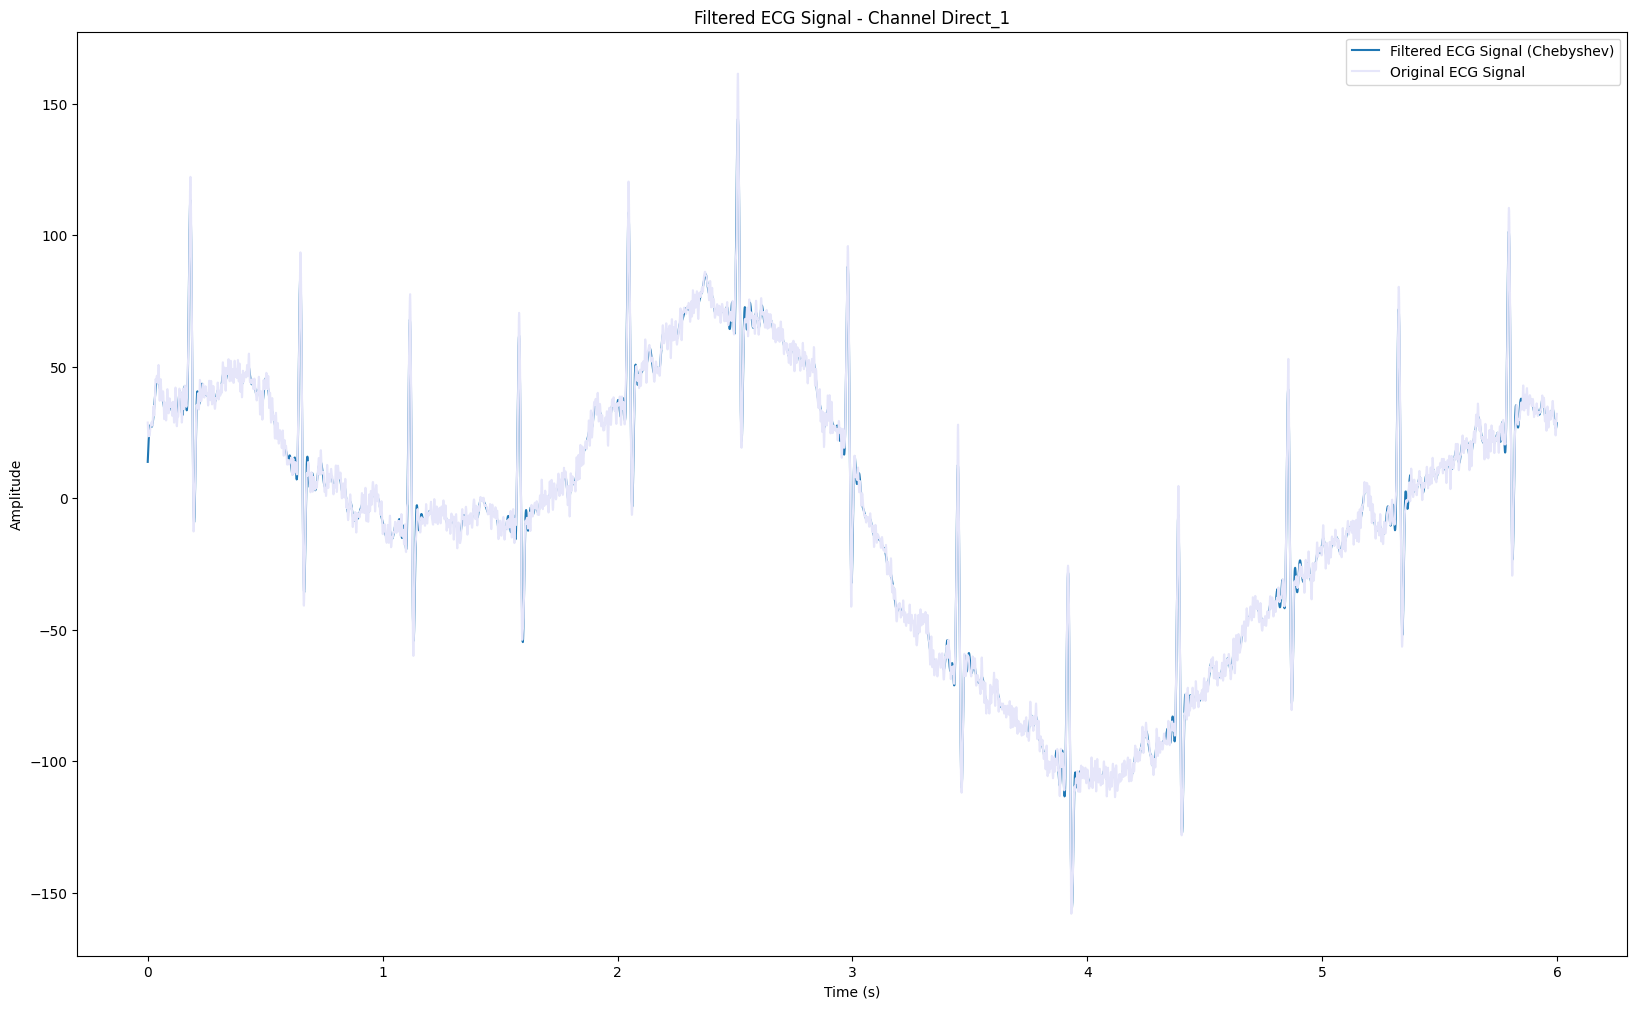

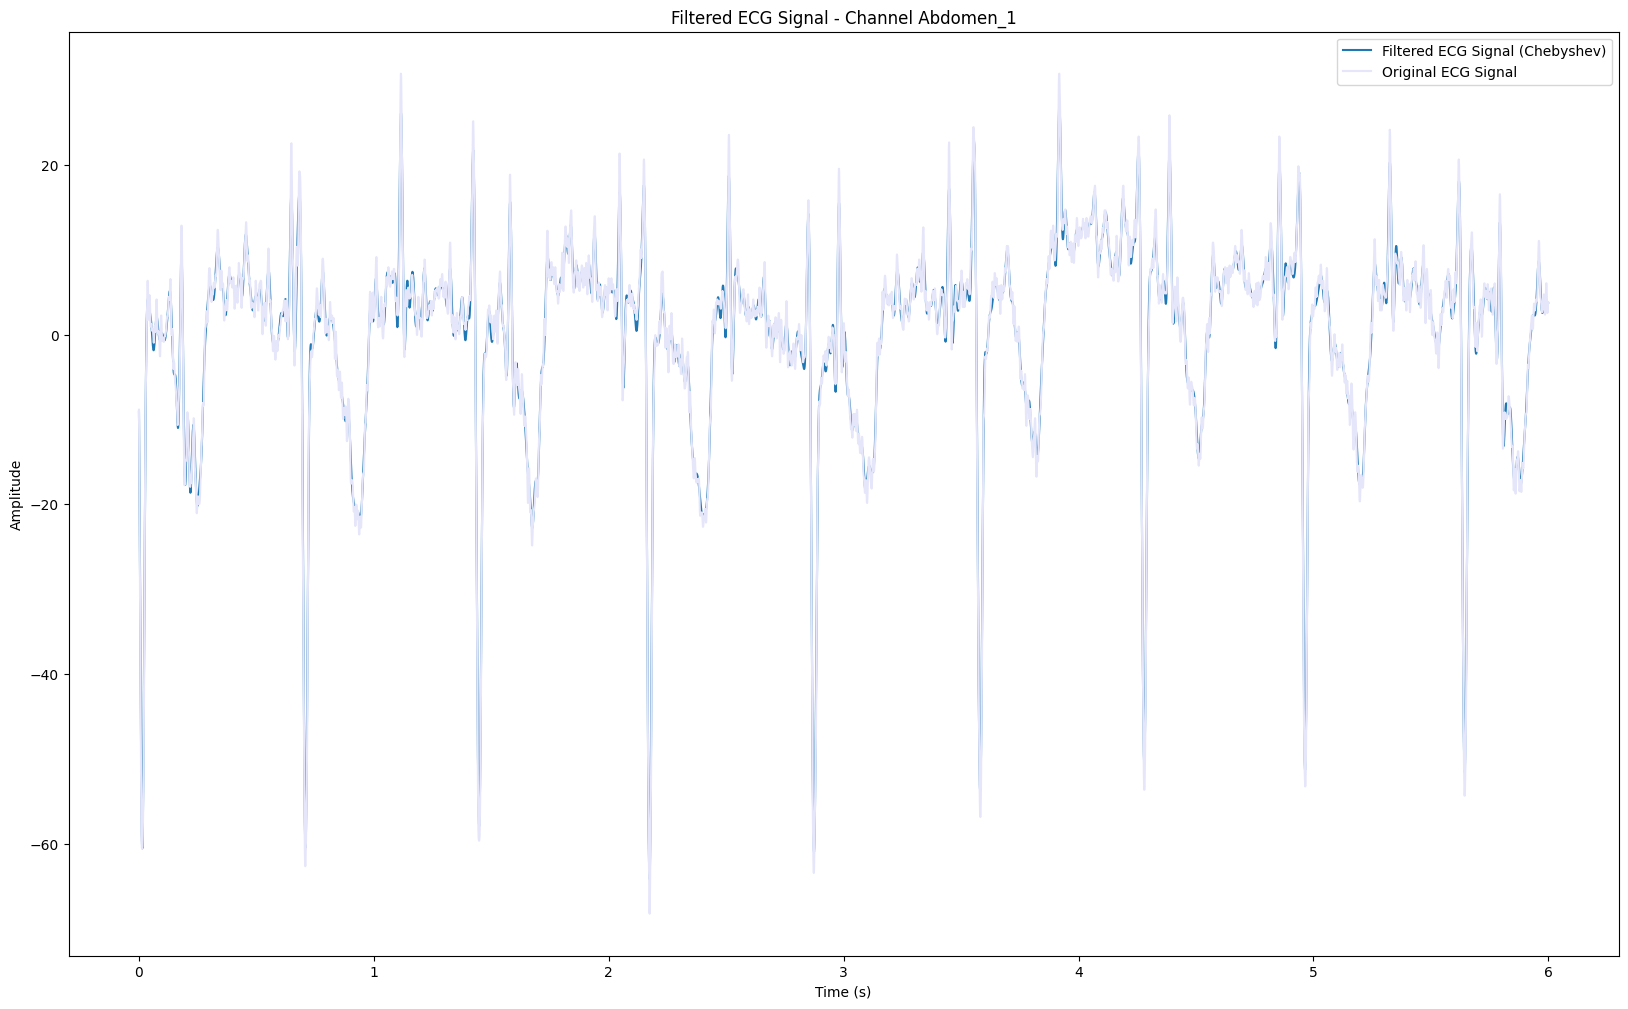

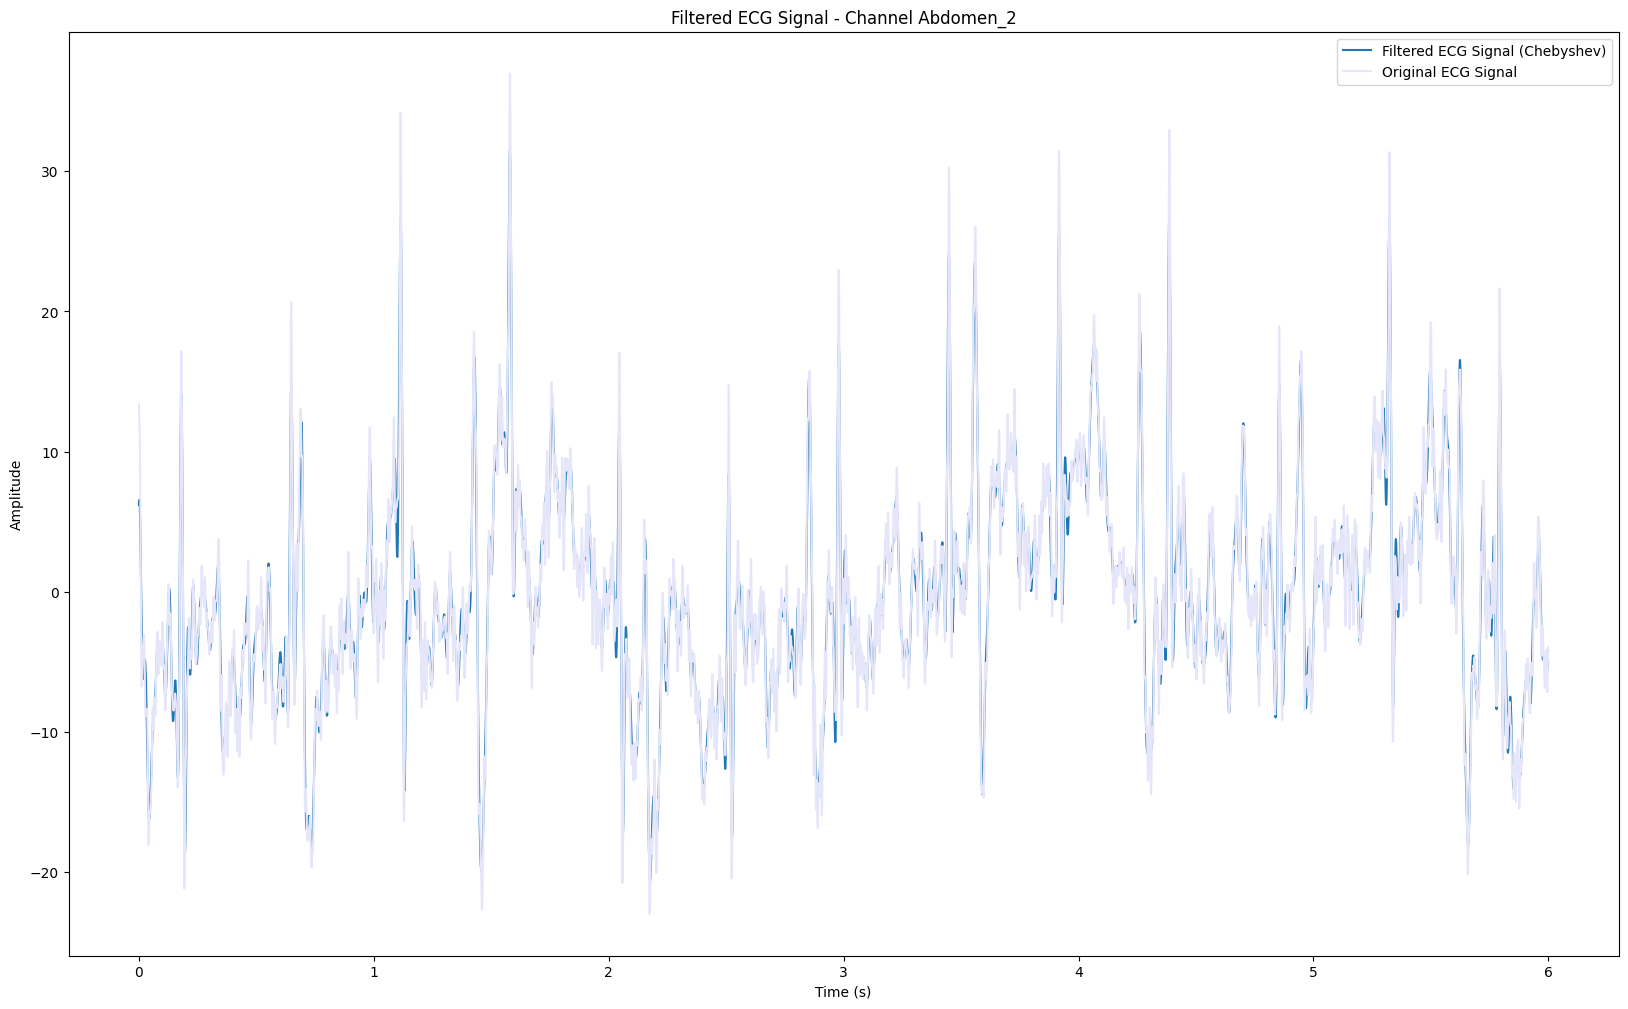

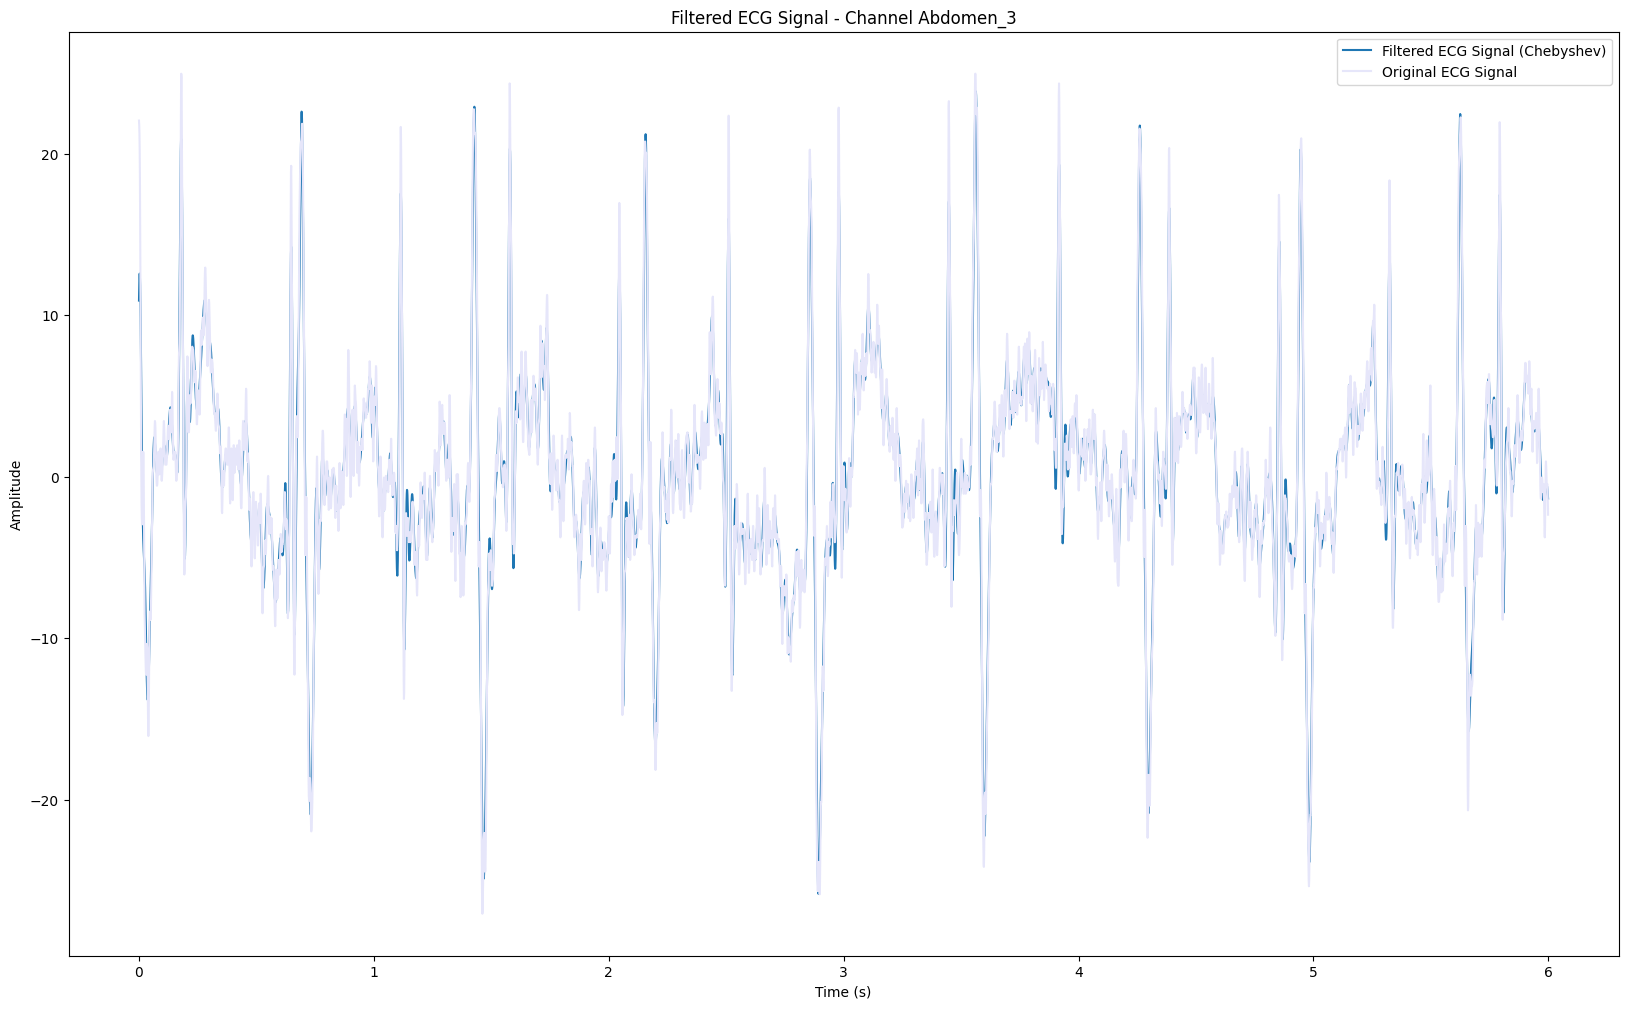

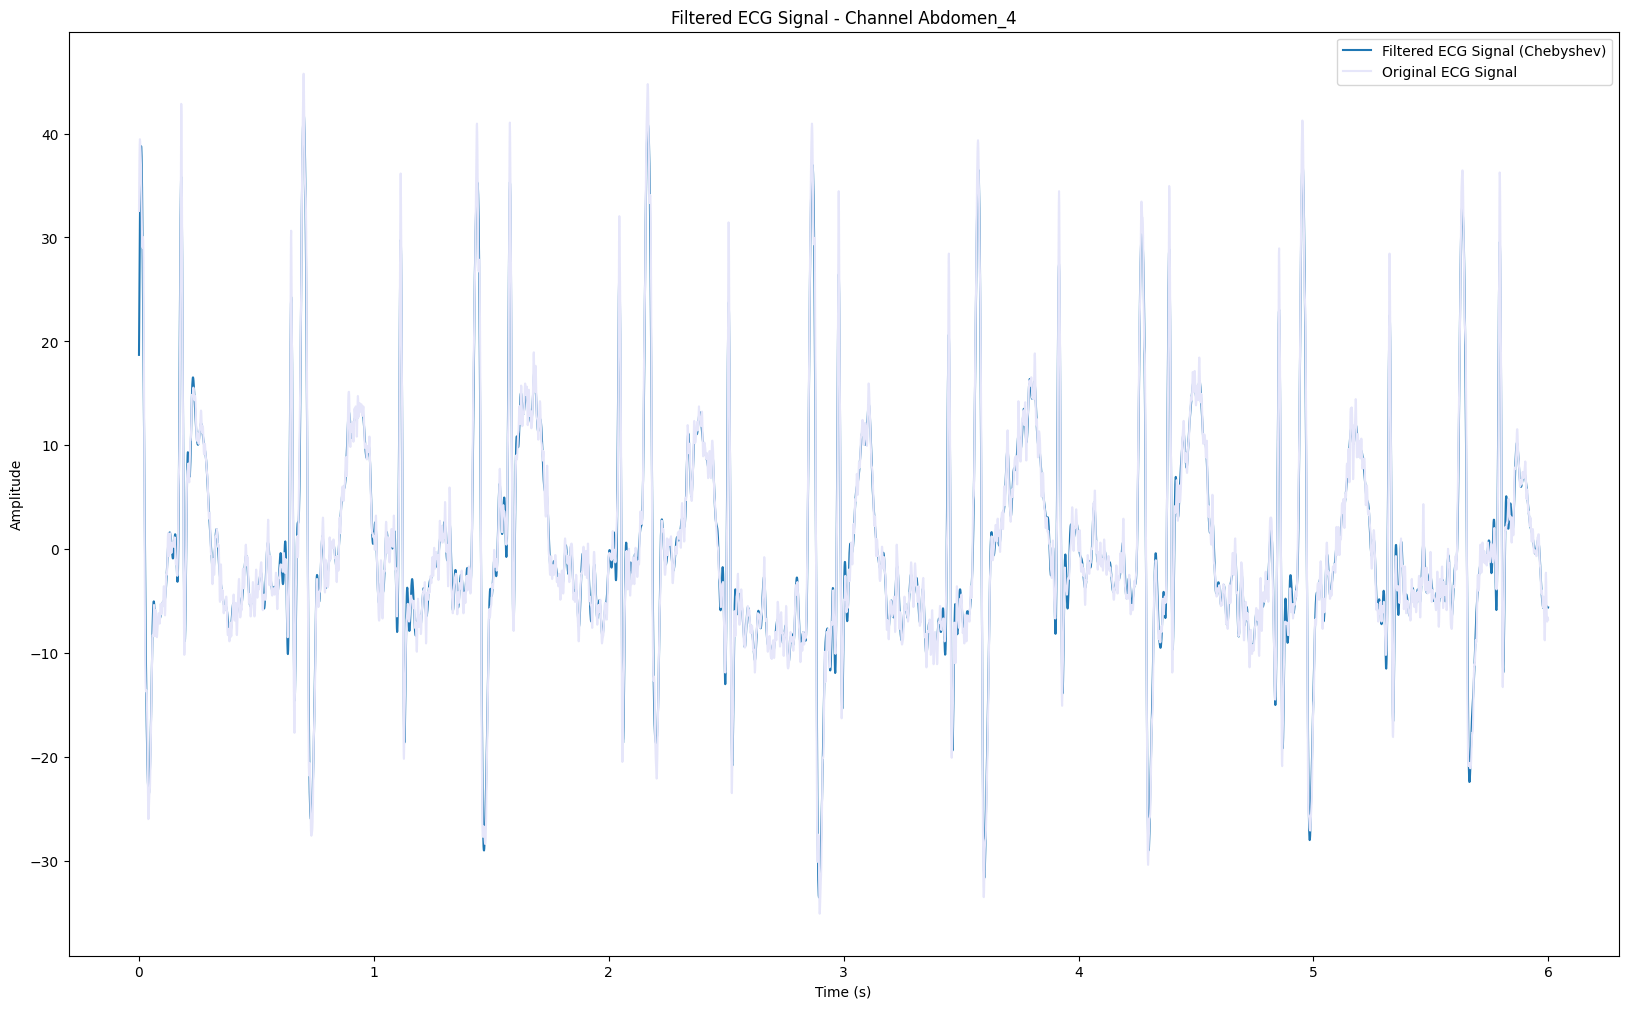

In [19]:
cutoff_cheby2 = 50

for keys in signal_dict:
    signal,fs = signal_dict[keys]
    filtered_ecg_cheby = design_filter('cheby', cutoff_cheby2, fs,signal, 101)
    t = np.arange(len(signal)) / fs
    # Plotting
    plt.figure(figsize=(20, 12))
    plt.plot(t[:6000], filtered_ecg_cheby[:6000], label='Filtered ECG Signal (Chebyshev)')
    plt.plot(t[:6000], signal[:6000], label='Original ECG Signal',c='lavender')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Filtered ECG Signal - Channel {keys}')
    plt.legend()

    plt.show()


Median Filter

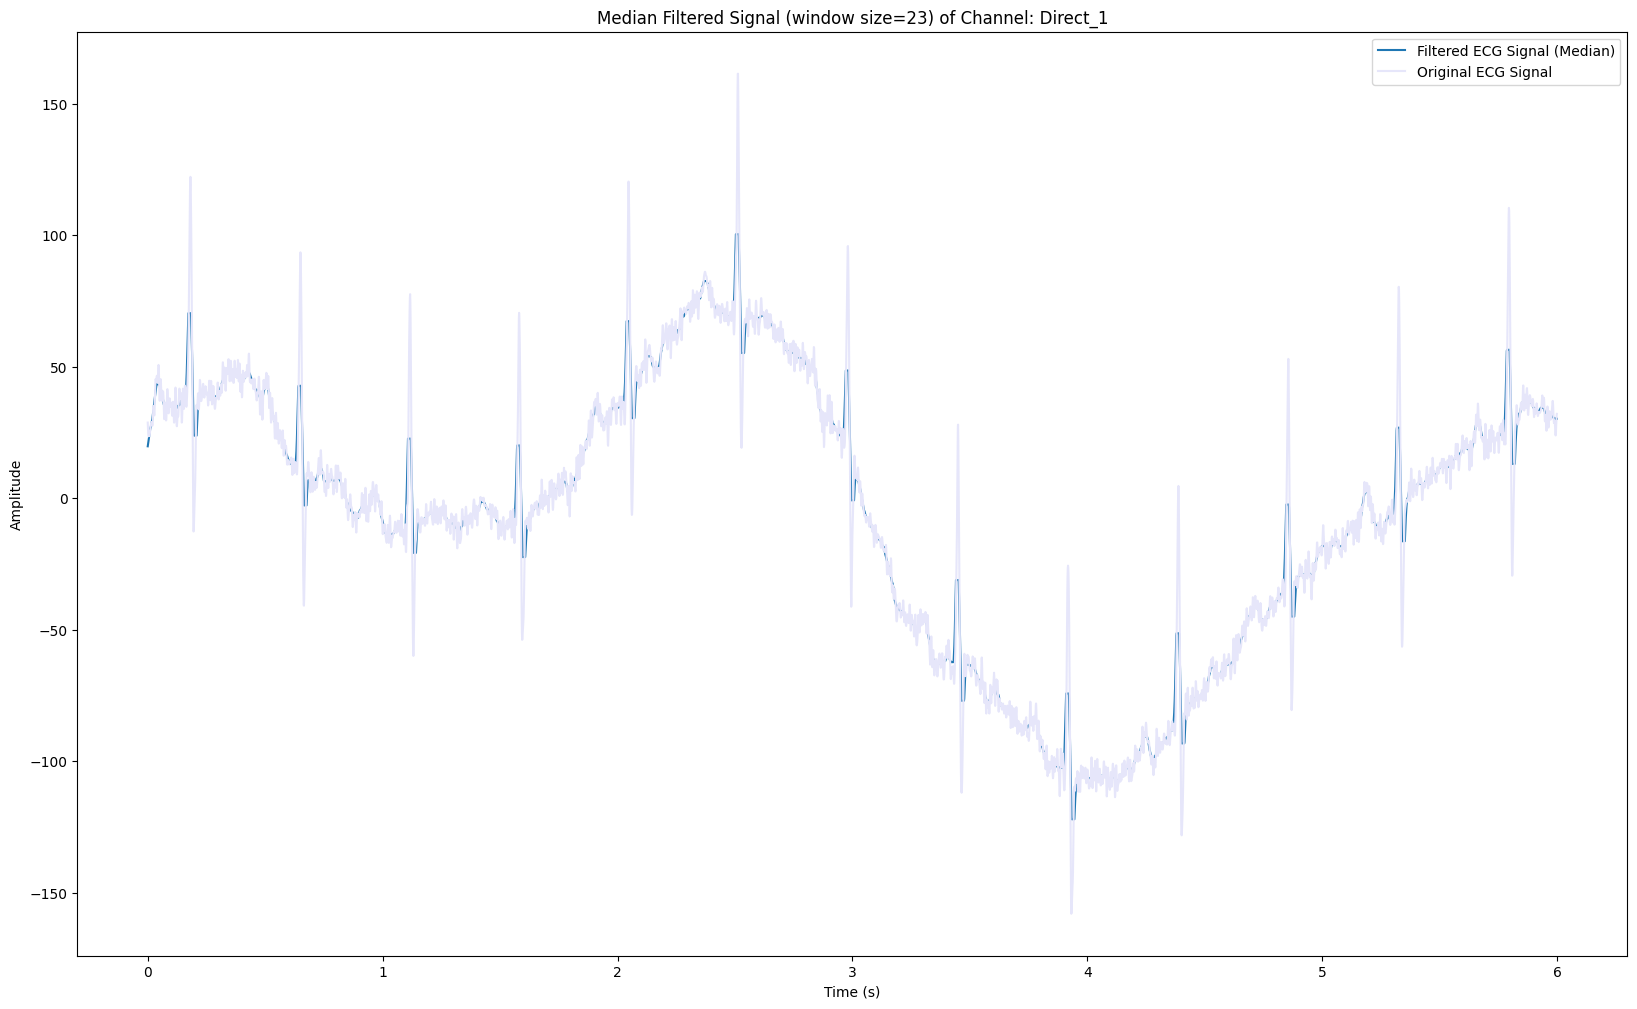

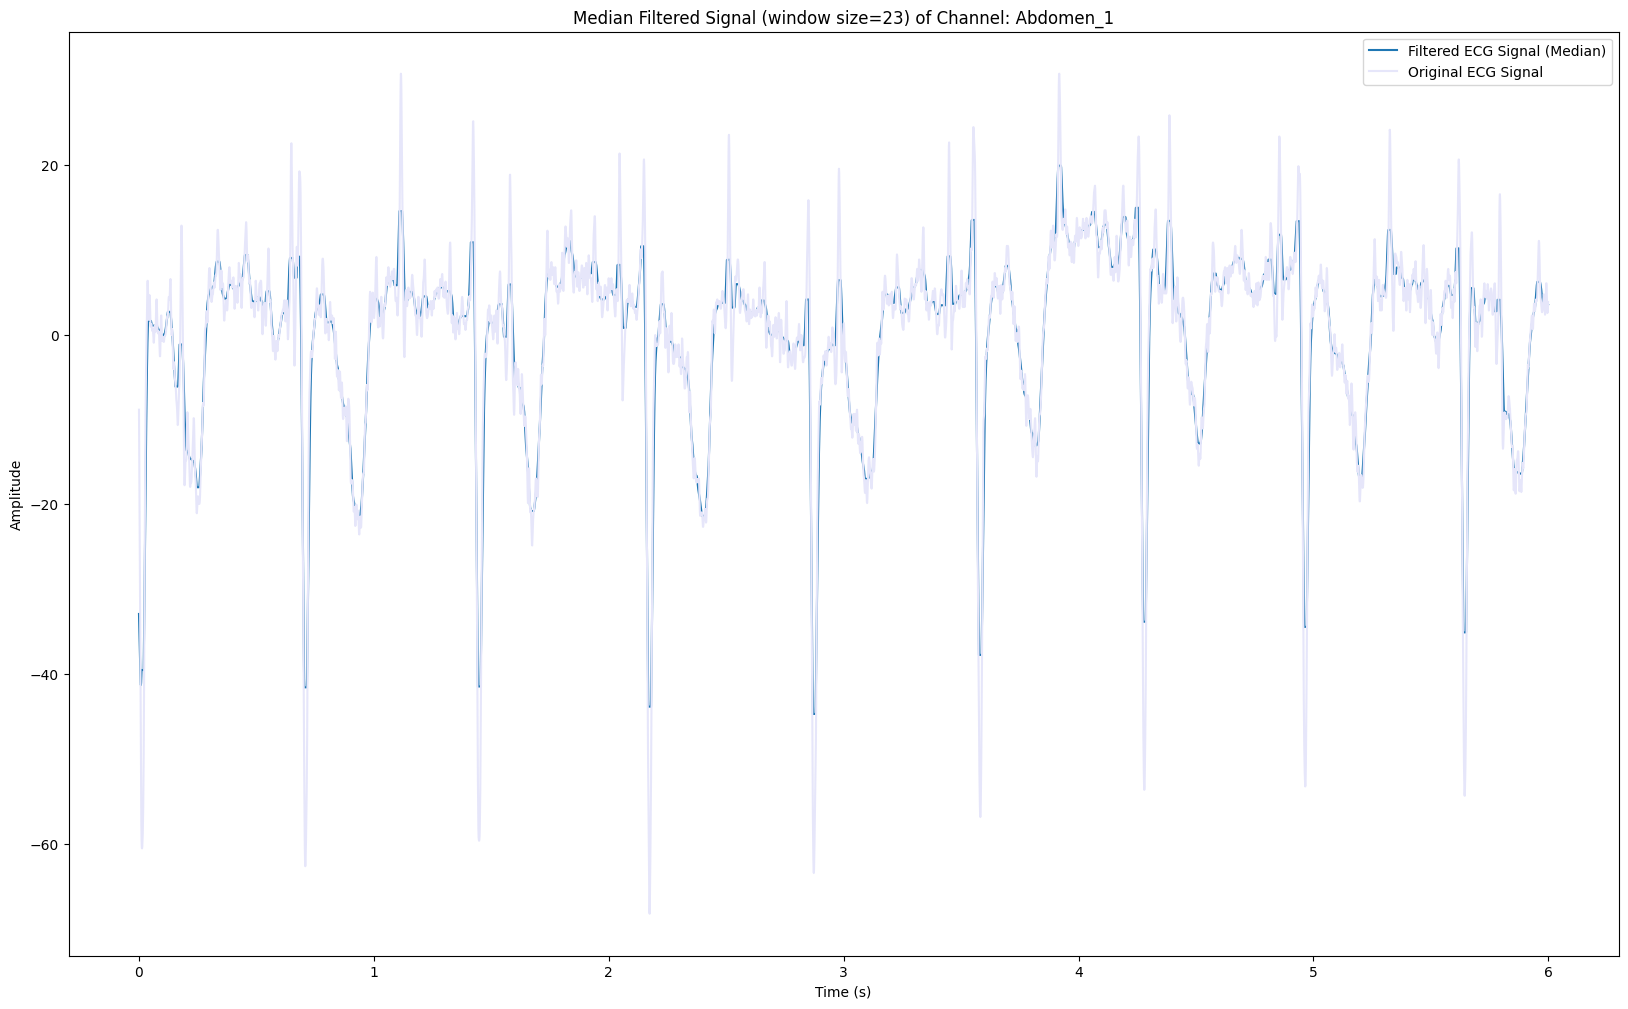

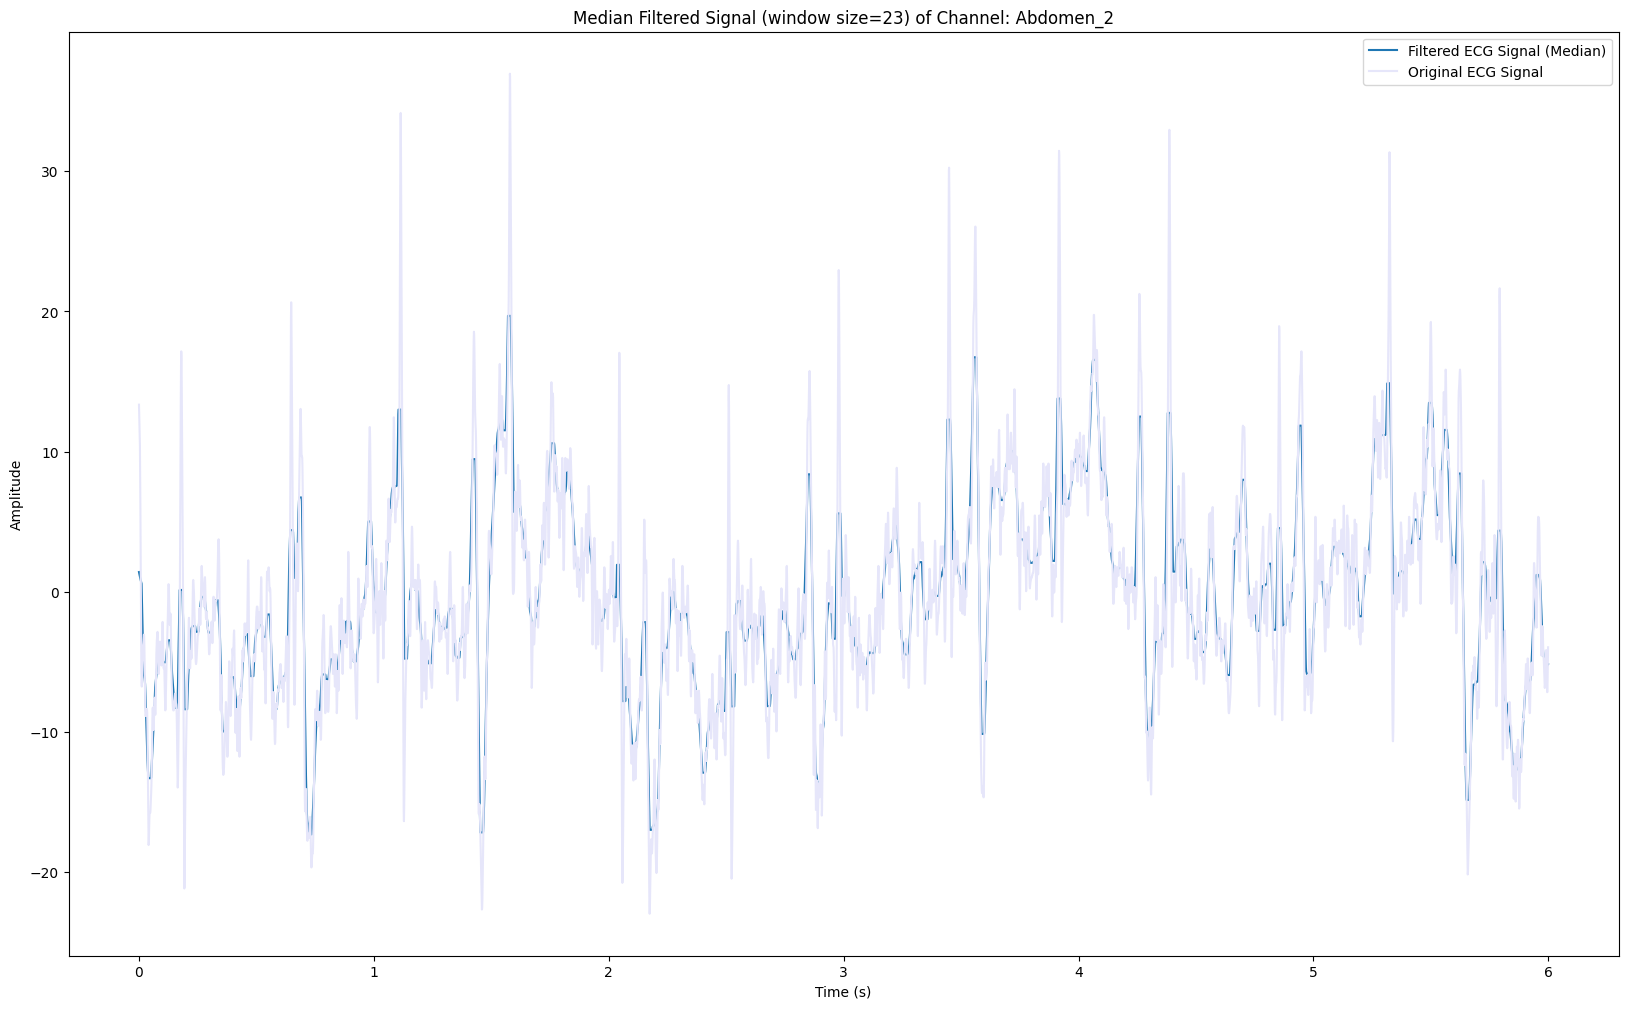

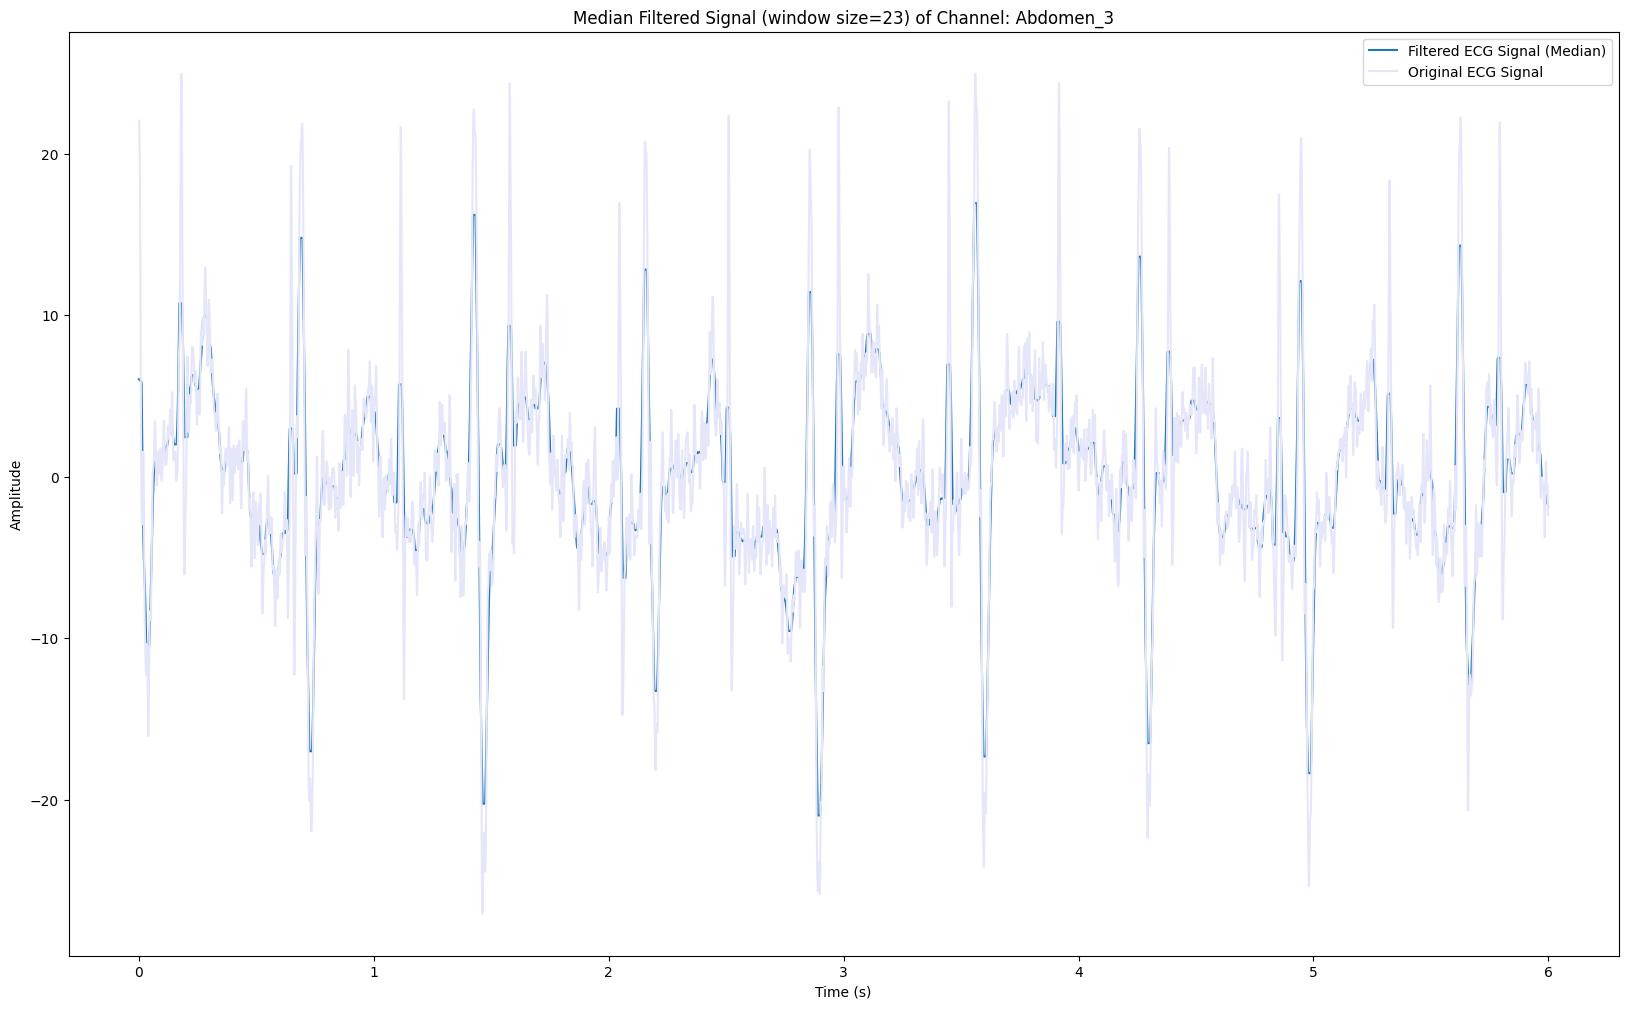

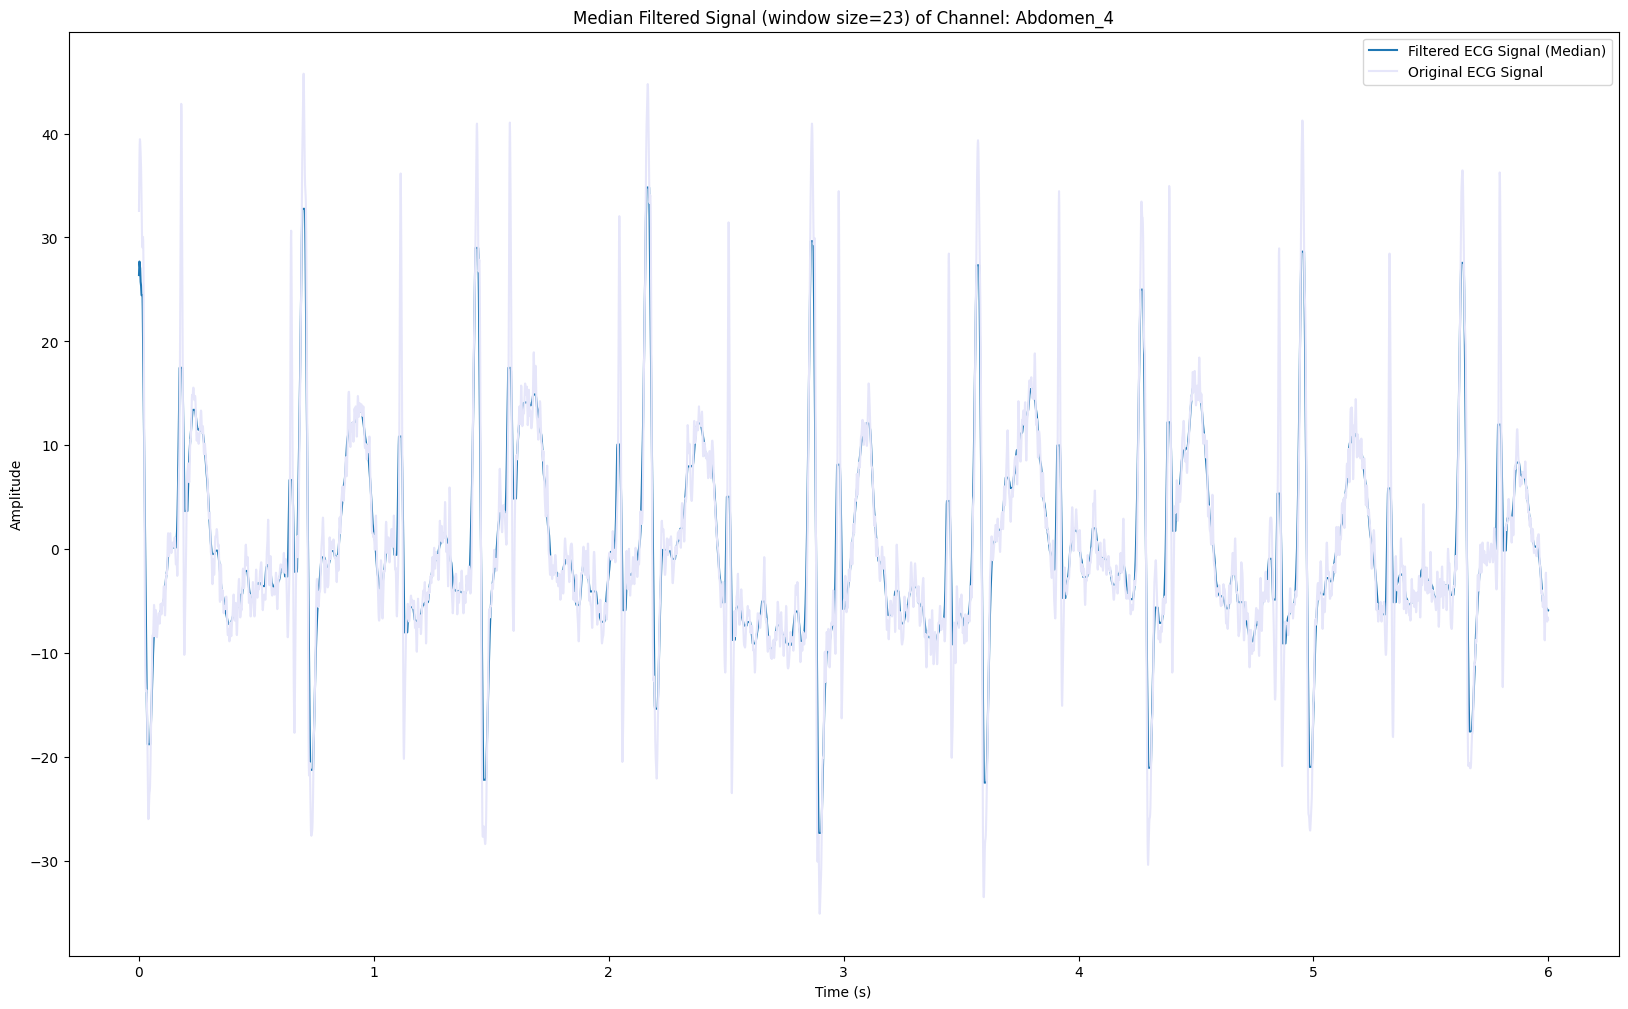

In [24]:
def median_filter_fir(data, window_size):
    # Apply a moving average filter using FIR approach
    kernel = np.ones(window_size) / window_size
    moving_avg = convolve(data, kernel, mode='same')
    
    # Apply non-linear operation to approximate median
    half_window = window_size // 2
    filtered_data = np.zeros_like(data)
    for i in range(len(data)):
        start = max(0, i - half_window)
        end = min(len(data), i + half_window + 1)
        window = moving_avg[start:end]
        filtered_data[i] = np.median(window)
    return filtered_data

window_size = 23

for keys in signal_dict:
    signal,fs = signal_dict[keys]
    filtered_ecg_median = median_filter_fir(signal,window_size)
    # print(filtered_ecg_median)
    t = np.arange(len(signal)) / fs
    # Plotting
    plt.figure(figsize=(20, 12))
    plt.plot(t[:6000], filtered_ecg_median[:6000], label='Filtered ECG Signal (Median)')
    plt.plot(t[:6000], signal[:6000], label='Original ECG Signal',c='lavender')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Median Filtered Signal (window size={}) of Channel: {}'.format(window_size, keys))
    plt.legend()

    plt.show()
